In [1]:
#22
import numpy as np
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

# Time Series Stationarity Test
def check_stationarity(time_series):
    """
    Perform ADF test for stationarity.
    :param time_series: Array-like time series data.
    :return: Dictionary with stationarity result, test statistic, and p-value.
    """
    result = adfuller(time_series)
    return {
        "is_stationary": result[1] < 0.05,
        "test_statistic": result[0],
        "p_value": result[1],
    }

# Autoregressive Integrated Moving Average (ARIMA) Model
def fit_arima_model(data, p, d, q):
    """
    Fit an ARIMA model to the time series.
    :param data: Array-like time series data.
    :param p: AR order.
    :param d: Integrated order (differencing).
    :param q: MA order.
    :return: Fitted ARIMA model.
    """
    try:
        model = ARIMA(data, order=(p, d, q))
        return model.fit()
    except Exception as e:
        print(f"Error fitting ARIMA model: {e}")
        return None

# GARCH Model
def fit_garch_model(returns, p, q):
    """
    Fit a GARCH model to return series.
    :param returns: Array-like return series.
    :param p: GARCH order.
    :param q: ARCH order.
    :return: Fitted GARCH model.
    """
    try:
        model = arch_model(returns, vol="Garch", p=p, q=q)
        return model.fit(disp="off")
    except Exception as e:
        print(f"Error fitting GARCH model: {e}")
        return None

# Cointegration and Error Correction Model
def cointegration_test(series_x, series_y):
    """
    Test for cointegration and fit an Error Correction Model.
    :param series_x: Array-like time series data X.
    :param series_y: Array-like time series data Y.
    :return: Cointegration test statistic and p-value.
    """
    score, p_value, _ = coint(series_x, series_y)
    return {
        "test_statistic": score,
        "p_value": p_value,
    }

# Example time series data
data = np.random.normal(0, 1, 100)
returns = np.diff(data)

# Stationarity Check
stationarity_result = check_stationarity(data)

# Fitting ARIMA Model
arima_model = fit_arima_model(data, p=1, d=1, q=1)

# Fitting GARCH Model
garch_model = fit_garch_model(returns, p=1, q=1)

# Cointegration Test with dummy data
series_a = np.random.normal(0, 1, 100)
series_b = np.random.normal(0, 1, 100)
cointegration_result = cointegration_test(series_a, series_b)

# Output results for demonstration
print("Stationarity Test Result:", stationarity_result)
if arima_model:
    print("ARIMA Summary:\n", arima_model.summary())
if garch_model:
    print("GARCH Summary:\n", garch_model.summary())
print("Cointegration Test Result:", cointegration_result)

Stationarity Test Result: {'is_stationary': True, 'test_statistic': -9.433537891212215, 'p_value': 5.113904597106469e-16}
ARIMA Summary:
                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -140.985
Date:                Thu, 05 Dec 2024   AIC                            287.970
Time:                        14:20:50   BIC                            295.755
Sample:                             0   HQIC                           291.120
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0312      0.119      0.262      0.794      -0.203      

In [2]:
#23
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Distance Calculation
def calculate_distance(x_i, x_j):
    """
    Calculate Euclidean distance between two high-dimensional data points.
    :param x_i: First data point.
    :param x_j: Second data point.
    :return: Euclidean distance.
    """
    return np.linalg.norm(x_i - x_j)

# PCA
def perform_pca(data, n_components):
    """
    Perform PCA on high-dimensional data.
    :param data: High-dimensional dataset.
    :param n_components: Number of principal components.
    :return: Transformed data.
    """
    pca = PCA(n_components=n_components)
    return pca.fit_transform(data)

# t-SNE
def perform_tsne(data, n_components, random_state=42):
    """
    Perform t-SNE for data visualization.
    :param data: High-dimensional dataset.
    :param n_components: Dimension of embedded space.
    :param random_state: Random seed for reproducibility.
    :return: Embedded space data.
    """
    tsne = TSNE(n_components=n_components, random_state=random_state)
    return tsne.fit_transform(data)

# Lasso Regression
def fit_lasso(X, y, alpha):
    """
    Fit Lasso regression model to data.
    :param X: Feature dataset.
    :param y: Response variable.
    :param alpha: Regularization strength.
    :return: Fitted Lasso model.
    """
    model = Lasso(alpha=alpha)
    model.fit(X, y)
    return model

# SVM Classifier
def fit_svm(X, y, C):
    """
    Train Support Vector Machine (SVM) classifier.
    :param X: Feature dataset.
    :param y: Target labels.
    :param C: Regularization parameter.
    :return: Trained SVM model.
    """
    svm = SVC(C=C)
    svm.fit(X, y)
    return svm

# Random Forest Classifier
def train_random_forest(X, y, n_estimators):
    """
    Train Random Forest classifier.
    :param X: Feature dataset.
    :param y: Target labels.
    :param n_estimators: Number of trees in the forest.
    :return: Trained Random Forest model.
    """
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X, y)
    return rf

# Variance Inflation Factor (VIF)
def calculate_vif(X):
    """
    Calculate Variance Inflation Factor (VIF) for each feature.
    :param X: Feature dataset.
    :return: Array of VIF values.
    """
    if X.shape[1] < 2:
        raise ValueError("VIF calculation requires at least two features.")
    vif_data = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return np.array(vif_data)

# Example usage with dummy data
X = np.random.rand(100, 10)  # Feature matrix with 100 samples, 10 features
y = np.random.randint(0, 2, 100)  # Binary target variable

# Distance calculation example
distance = calculate_distance(X[0], X[1])

# Perform PCA
X_pca = perform_pca(X, n_components=2)

# Perform t-SNE
X_tsne = perform_tsne(X, n_components=2)

# Fit Lasso Regression
lasso_model = fit_lasso(X, y, alpha=0.1)

# Fit SVM
svm_model = fit_svm(X, y, C=1.0)

# Train Random Forest
rf_model = train_random_forest(X, y, n_estimators=100)

# Calculate VIF
vif_values = calculate_vif(X)

# Output results
print("Distance between X[0] and X[1]:", distance)
print("First 5 VIF Values:", vif_values[:5])
print("Lasso Coefficients:", lasso_model.coef_)

Distance between X[0] and X[1]: 1.401817368780378
First 5 VIF Values: [4.02651696 3.83718431 3.89590016 4.30126869 4.17979677]
Lasso Coefficients: [ 0.  0.  0. -0. -0.  0. -0. -0. -0. -0.]


In [3]:
#24
import numpy as np
from scipy.fftpack import fft, fftfreq
from scipy.signal import butter, filtfilt
import pywt

# Fourier Transform functions
def fft_analysis(signal, sampling_rate):
    """
    Perform FFT on a given signal.
    :param signal: Input time-domain signal.
    :param sampling_rate: Sampling rate of the signal.
    :return: Frequency and magnitude spectrum of the signal.
    """
    N = len(signal)
    fhat = fft(signal)
    freqs = fftfreq(N, d=1 / sampling_rate)
    spectrum = np.abs(fhat)
    return freqs, spectrum

# Butterworth Filter Example
def butter_lowpass_filter(data, cutoff, fs, order=5):
    """
    Apply a low-pass Butterworth filter to data.
    :param data: The input signal data.
    :param cutoff: Cutoff frequency for the filter.
    :param fs: Sampling rate of the data.
    :param order: Order of the filter.
    :return: Filtered data.
    """
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Wavelet Transform
def discrete_wavelet_transform(signal, wavelet='db1'):
    """
    Perform Discrete Wavelet Transform on a signal.
    :param signal: Input signal.
    :param wavelet: Type of wavelet to use.
    :return: Approximation and detail coefficients.
    """
    coeffs = pywt.wavedec(signal, wavelet)
    return coeffs

# Kalman Filtering Template
def kalman_filter(measurements, A, B, H, Q, R, x_0, P_0):
    """
    Apply Kalman Filter to a series of measurements.
    :param measurements: Observed data at each time step.
    :param A: State transition matrix.
    :param B: Control-input model.
    :param H: Observation model matrix.
    :param Q: Covariance of process noise.
    :param R: Covariance of observation noise.
    :param x_0: Initial state estimate.
    :param P_0: Initial estimate covariance.
    :return: Filtered state estimates and covariances.
    """
    n = len(measurements)  # Number of measurements
    x = np.zeros((n, x_0.shape[0]))
    P = np.zeros((n, x_0.shape[0], x_0.shape[0]))
    x_k = x_0
    P_k = P_0

    for k in range(n):
        # Prediction phase
        x_k = A @ x_k + B
        P_k = A @ P_k @ A.T + Q

        # Update phase
        S = H @ P_k @ H.T + R
        K = P_k @ H.T @ np.linalg.inv(S)
        x_k = x_k + K @ (measurements[k] - H @ x_k)
        P_k = (np.eye(K.shape[0]) - K @ H) @ P_k

        # Store results
        x[k] = x_k.T
        P[k] = P_k

    return x, P

# Demonstrative Variables
signal_data = np.sin(np.linspace(0, 2 * np.pi, 1000)) + 0.5 * np.random.normal(size=1000)
sampling_rate = 1000
cutoff = 10  # Example cutoff for low-pass filter (in Hz)
order = 5

# Example Usage
freqs, spectrum = fft_analysis(signal_data, sampling_rate)
filtered_signal = butter_lowpass_filter(signal_data, cutoff, sampling_rate, order)
dwt_coeffs = discrete_wavelet_transform(signal_data)

# Kalman Filter Example
measurements_example = np.cumsum(np.random.normal(size=50))
A_example = np.eye(1)
B_example = np.zeros((1,))
H_example = np.eye(1)
Q_example = np.eye(1) * 0.001
R_example = np.eye(1) * 0.01
x_0_example = np.zeros((1,))
P_0_example = np.eye(1)

filtered_states, covariances = kalman_filter(
    measurements_example, A_example, B_example, H_example, Q_example, R_example, x_0_example, P_0_example
)

# Outputs for demonstration
print("Frequency Spectrum:", spectrum[:10])  # Display first 10 for brevity
print("Filtered Signal (first 10 samples):", filtered_signal[:10])
print("Wavelet Coefficients (Approximation):", dwt_coeffs[0][:10])  # Approximation coefficients
print("Filtered States (Kalman):", filtered_states[:10])  # First 10 states

Frequency Spectrum: [ 15.84377657 495.96703214  23.59214201  13.98931079  19.85196068
  13.25300742  15.24862756  19.95258534  12.48497842  12.29364421]
Filtered Signal (first 10 samples): [0.05975361 0.06133992 0.06303911 0.06485356 0.06678544 0.06883678
 0.07100942 0.07330504 0.0757251  0.0782709 ]
Wavelet Coefficients (Approximation): [ 14.09891089 -13.02715591]
Filtered States (Kalman): [[-0.14591687]
 [-0.40751113]
 [-0.61864207]
 [-1.20041457]
 [-1.85998572]
 [-1.84516202]
 [-2.16258385]
 [-2.4795281 ]
 [-2.40742241]
 [-2.42290972]]


In [4]:
#25
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification, make_blobs
from sklearn.preprocessing import StandardScaler
import gym

# Linear Regression
def linear_regression(X, y):
    """
    Perform linear regression using sklearn's LinearRegression.
    :param X: Input features.
    :param y: Target variable.
    :return: Fitted model coefficients and intercept.
    """
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_, model.intercept_

# Support Vector Machine
def support_vector_machine(X, y):
    """
    Train an SVM for binary classification.
    :param X: Input features.
    :param y: Class labels.
    :return: Trained SVM model.
    """
    svc = SVC(kernel="linear")
    svc.fit(X, y)
    return svc

# K-means Clustering
def kmeans_clustering(X, n_clusters):
    """
    Perform K-means clustering using sklearn's KMeans.
    :param X: Data points.
    :param n_clusters: Number of clusters.
    :return: Cluster labels.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    return kmeans.labels_

# Principal Component Analysis
def pca_analysis(X, n_components):
    """
    Perform PCA to reduce dimensionality.
    :param X: Input data.
    :param n_components: Number of principal components.
    :return: Transformed data.
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=n_components)
    return pca.fit_transform(X_scaled)

def reinforcement_learning(env_name, n_episodes):
    """
    Simulate a reinforcement learning scenario using OpenAI's Gym.
    :param env_name: Name of the environment.
    :param n_episodes: Number of episodes to simulate.
    :return: Total rewards from the simulation.
    """
    env = gym.make(env_name)
    total_rewards = []

    for episode in range(n_episodes):
        state, _ = env.reset() if isinstance(env.reset(), tuple) else (env.reset(), {})
        episode_reward = 0
        done = False

        while not done:
            action = env.action_space.sample()  # Random action
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            episode_reward += reward

        total_rewards.append(episode_reward)

    env.close()
    return total_rewards

# Example Usages

# Linear Regression
X_lin = np.array([[1, 2], [2, 3], [4, 5]])
y_lin = np.array([3, 4, 6])
coefficients, intercept = linear_regression(X_lin, y_lin)

# Support Vector Machine
X_svm, y_svm = make_classification(n_samples=100, n_features=4, random_state=42)
svm_model = support_vector_machine(X_svm, y_svm)

# K-means Clustering
X_kmeans, _ = make_blobs(n_samples=100, centers=3, random_state=42)
cluster_labels = kmeans_clustering(X_kmeans, n_clusters=3)

# Principal Component Analysis
X_pca = np.random.rand(100, 5)
transformed_data = pca_analysis(X_pca, n_components=2)

# Reinforcement Learning with OpenAI Gym
env_name = "CartPole-v1"
rewards = reinforcement_learning(env_name, n_episodes=10)

# Outputs for Demonstration
print("Linear Regression Coefficients:", coefficients)
print("Linear Regression Intercept:", intercept)
print("SVM Model Coefficients (Support Vectors):", svm_model.coef_)
print("Cluster Labels (K-means):", cluster_labels)
print("PCA Transformed Data (First 5 Rows):\n", transformed_data[:5])
print("Rewards from RL Environment (10 Episodes):", rewards)

Linear Regression Coefficients: [0.5 0.5]
Linear Regression Intercept: 1.4999999999999996
SVM Model Coefficients (Support Vectors): [[-0.50207289 -0.79315812 -1.14768118  1.61366917]]
Cluster Labels (K-means): [1 2 0 2 1 2 0 2 2 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 2 1 1 1 1 2 2 1 0 0 0
 0 2 2 1 0 2 0 0 2 1 1 1 2 2 2 0 1 1 1 0 0 2 0 1 2 1 2 1 1 2 1 2 2 2 1 1 0
 2 1 2 1 2 2 0 2 0 1 0 0 0 2 0 2 2 2 0 2 0 0 0 2 1 0]
PCA Transformed Data (First 5 Rows):
 [[ 0.99222086 -1.20555824]
 [ 1.50514596  0.62968648]
 [ 0.57979438  0.65876974]
 [ 1.7453086  -0.84414743]
 [ 1.10231587 -0.20235543]]
Rewards from RL Environment (10 Episodes): [41.0, 12.0, 36.0, 22.0, 22.0, 25.0, 18.0, 59.0, 16.0, 14.0]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
#26
import numpy as np
from sklearn.metrics import pairwise_distances

# Persistence Landscape
def persistence_landscape(diagram, x_range):
    """
    Generate a persistence landscape from a persistence diagram.
    :param diagram: A list of tuples representing (birth, death).
    :param x_range: Range of x for the landscape.
    :return: An array representing the persistence landscape.
    """
    landscape = np.zeros_like(x_range)
    for b, d in diagram:
        if b < d:
            mask = (x_range >= b) & (x_range <= d)
            values = np.minimum(x_range[mask] - b, d - x_range[mask])
            landscape[mask] = np.maximum(landscape[mask], values)
    return landscape

# Persistence Image
def persistence_image(diagram, resolution=(20, 20)):
    """
    Calculate a persistence image from a persistence diagram.
    :param diagram: A list of tuples representing (birth, death).
    :param resolution: Resolution of the persistence image.
    :return: A 2D numpy array representing the persistence image.
    """
    x_min, x_max = min(b for b, d in diagram), max(d for b, d in diagram)
    y_max = max(d - b for b, d in diagram)
    x_range = np.linspace(x_min, x_max, resolution[0])
    y_range = np.linspace(0, y_max, resolution[1])
    image = np.zeros((resolution[0], resolution[1]))

    for b, d in diagram:
        if b < d:
            x_center = (b + d) / 2
            y_center = (d - b) / 2
            for i, x in enumerate(x_range):
                for j, y in enumerate(y_range):
                    image[i, j] += np.exp(-((x - x_center) ** 2 + (y - y_center) ** 2))
    return image

# Mapper Algorithm
def mapper_algorithm(data, resolution, function):
    """
    Applies the Mapper algorithm to the given data.
    :param data: Input data matrix.
    :param resolution: Number of intervals to split the function range.
    :param function: Function to apply to data.
    :return: The Mapper graph representation (a simplicial complex).
    """
    filter_values = function(data)
    intervals = np.linspace(min(filter_values), max(filter_values), resolution)
    clusters = []

    for i in range(len(intervals) - 1):
        mask = (filter_values >= intervals[i]) & (filter_values < intervals[i + 1])
        points = data[mask]
        if len(points) == 0:
            continue
        distance_matrix = pairwise_distances(points)
        clusters.append(distance_matrix < np.min(distance_matrix) * 2)

    # Placeholder for graph-building logic
    return clusters

# TDARLAgent Class
class TDARLAgent:
    def __init__(self, state_size, topological_features_size):
        self.state_size = state_size
        self.topological_features_size = topological_features_size
        self.weights = np.random.rand(self.state_size + self.topological_features_size)

    def value_function(self, state, topological_features):
        """
        Approximates the value function in reinforcement learning.
        :param state: Current state representation.
        :param topological_features: Topological features for the state.
        :return: Approximated value.
        """
        combined = np.concatenate([state, topological_features])
        return np.dot(combined, self.weights)

    def update(self, target, state, topological_features, learning_rate=0.01):
        """
        Updates the weights of the value function.
        :param target: Target value to achieve after update.
        :param state: Current state representation.
        :param topological_features: Topological features for the state.
        :param learning_rate: Learning rate for the update.
        """
        combined = np.concatenate([state, topological_features])
        error = target - self.value_function(state, topological_features)
        self.weights += learning_rate * error * combined

# Example usage
diagram = [(0, 2), (1, 3)]
x_range = np.linspace(-1, 4, 100)
landscape = persistence_landscape(diagram, x_range)

image = persistence_image(diagram, resolution=(10, 10))

agent = TDARLAgent(state_size=5, topological_features_size=3)
state = np.random.rand(5)
topological_features = np.random.rand(3)
target = 10
agent.update(target, state, topological_features)

print("Persistence Landscape (first 10 values):", landscape[:10])
print("Persistence Image Shape:", image.shape)
print("Updated Agent Weights:", agent.weights)

Persistence Landscape (first 10 values): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Persistence Image Shape: (10, 10)
Updated Agent Weights: [0.58014078 0.27485421 0.2562927  0.30295591 0.44841307 0.80496999
 0.58575922 0.22277505]


Embedded Data Shape: (98, 3)
Number of Simplices: 13001
Raw Persistence Diagram: [(1, (0.2515023690706724, 0.3345729999557371)), (1, (0.17179582154368417, 0.24843498444983494)), (1, (0.2255163171846258, 0.30083196372875143)), (1, (0.22786495935943576, 0.30048758773078194)), (1, (0.18950364965383748, 0.26133562772948604)), (1, (0.22990033036283053, 0.29682729947524134)), (1, (0.21956616425091863, 0.28642585454277975)), (1, (0.2908272327851159, 0.3569598633554296)), (1, (0.17732747375757532, 0.23779785514801569)), (1, (0.2308108319397714, 0.2912002092083346)), (1, (0.19486910872576962, 0.2538867964493603)), (1, (0.23104062437428088, 0.2861548618106255)), (1, (0.24083185860980352, 0.2954243546321247)), (1, (0.24156703818849126, 0.2883861183223031)), (1, (0.20017070667021247, 0.2450101713944474)), (1, (0.2595049618358504, 0.30300546375672066)), (1, (0.19629169983534484, 0.23932578927913647)), (1, (0.18283502143977265, 0.2235063241246907)), (1, (0.2932884343252855, 0.33352532809564706)), (1

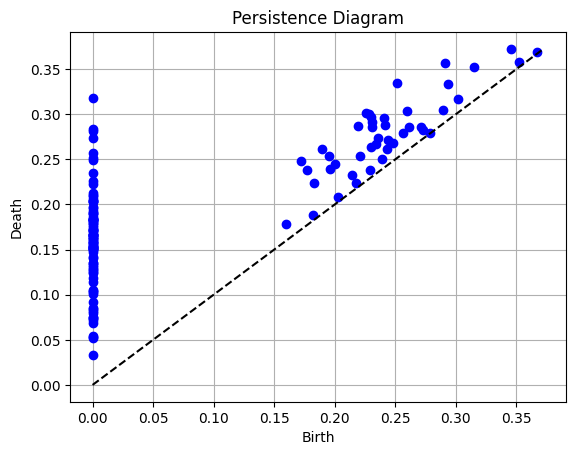

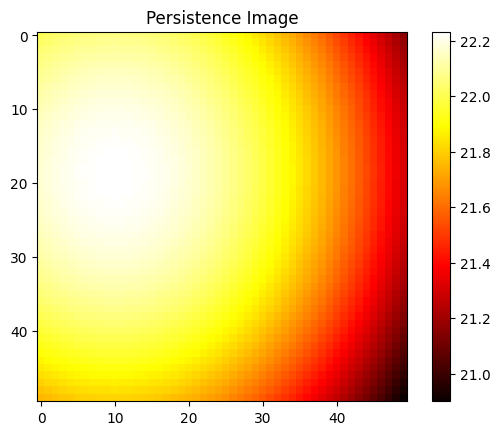

In [6]:
#27
import numpy as np
from gudhi import RipsComplex
from gudhi.representations import Landscape, PersistenceImage
import matplotlib.pyplot as plt

# Delay Embedding
def delay_embedding(time_series, d, tau):
    """
    Embeds time series using the delay embedding technique.
    :param time_series: Array of time series values.
    :param d: Embedding dimension.
    :param tau: Delay.
    :return: Embedded matrix.
    """
    n = len(time_series)
    if n <= (d - 1) * tau:
        raise ValueError("Time series not long enough for embedding.")
    return np.array([time_series[i:i + d * tau:tau] for i in range(n - (d - 1) * tau)])

# Construct Vietoris-Rips Complex
def construct_vietoris_rips_complex(points, epsilon):
    """
    Constructs Vietoris-Rips complex.
    :param points: Embedded time series points.
    :param epsilon: Maximum distance for simplices.
    :return: Rips complex.
    """
    rips = RipsComplex(points=points, max_edge_length=epsilon)
    simplex_tree = rips.create_simplex_tree(max_dimension=2)
    return simplex_tree

# Compute Persistence Diagram
def compute_persistence_diagram(simplex_tree):
    """
    Computes the persistence diagram.
    :param simplex_tree: Simplicial complex.
    :return: Filtered Persistence diagram.
    """
    raw_diagram = simplex_tree.persistence()
    return [pair for dim, pair in raw_diagram if dim == 0]  # Filter for dimension 0 only

# Persistence Landscapes
def persistence_landscapes(persistence_diagram, num_landscapes=5, resolution=100):
    """
    Calculates persistence landscapes.
    :param persistence_diagram: Persistence diagram.
    :param num_landscapes: Number of landscapes.
    :param resolution: Resolution for the landscape.
    :return: Persistence landscapes as numpy array.
    """
    landscapes = Landscape(resolution=resolution, num_landscapes=num_landscapes)
    landscapes.fit([np.array(persistence_diagram)])  # Convert diagram to NumPy array
    return landscapes.transform([np.array(persistence_diagram)])[0]

# Persistence Images
def persistence_images(persistence_diagram, pixels=(50, 50)):
    """
    Calculates persistence images.
    :param persistence_diagram: Persistence diagram.
    :param pixels: Tuple specifying image pixels.
    :return: Persistence image as numpy array.
    """
    # Initialize PersistenceImage with valid parameters
    pim = PersistenceImage(resolution=pixels)
    pim.fit([np.array(persistence_diagram)])  # Fit with the persistence diagram
    return pim.transform([np.array(persistence_diagram)])[0]

def filter_infinite_pairs(persistence_diagram):
    """
    Removes pairs with infinite death values from the persistence diagram.
    :param persistence_diagram: List of tuples with (dimension, (birth, death)).
    :return: Filtered persistence diagram as a list of (birth, death) tuples.
    """
    return [(birth, death) for _, (birth, death) in persistence_diagram if np.isfinite(death)]

# Custom function to plot the persistence diagram
def plot_persistence_diagram(diagram):
    """
    Custom function to plot a persistence diagram.
    :param diagram: List of (birth, death) tuples.
    """
    for birth, death in diagram:
        if np.isfinite(death):
            plt.plot([birth], [death], 'bo')  # Plot finite points
        else:
            plt.plot([birth], [plt.ylim()[1]], 'ro')  # Plot infinite points in red
    plt.plot([0, max(max(birth for birth, _ in diagram), max(death for _, death in diagram))],
             [0, max(max(birth for birth, _ in diagram), max(death for _, death in diagram))],
             'k--')  # Diagonal
    plt.xlabel("Birth")
    plt.ylabel("Death")
    plt.title("Persistence Diagram")
    plt.grid()

# Parameters for Financial Time Series
time_series = np.random.rand(100)  # Example time series data
d = 3  # Embedding dimension
tau = 1  # Delay
epsilon = 0.5  # Distance threshold

# Delay embedding
n = len(time_series)
if n <= (d - 1) * tau:
    raise ValueError("Time series not long enough for embedding.")
embedded_data = np.array([time_series[i:i + d * tau:tau] for i in range(n - (d - 1) * tau)])
print("Embedded Data Shape:", embedded_data.shape)

# Construct Rips complex and compute persistence
rips_complex = RipsComplex(points=embedded_data, max_edge_length=epsilon)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
print("Number of Simplices:", simplex_tree.num_simplices())

persistence_diagram = simplex_tree.persistence()
print("Raw Persistence Diagram:", persistence_diagram)

# Filter out infinite death values
filtered_diagram = filter_infinite_pairs(persistence_diagram)
print("Filtered Persistence Diagram:", filtered_diagram)

if not filtered_diagram:
    print("Empty filtered diagram. Adding dummy data.")
    filtered_diagram = [(0.0, 0.1), (0.1, 0.2)]

# Convert the filtered diagram to the correct format for Landscape
filtered_diagram_array = np.array(filtered_diagram)

# Compute Persistence Landscapes
landscapes = Landscape(resolution=100, num_landscapes=5)
landscapes.fit([filtered_diagram_array])  # Pass as a list of NumPy arrays
landscape_values = landscapes.transform([filtered_diagram_array])[0]
print("Persistence Landscapes Shape:", landscape_values.shape)

# Compute Persistence Images
pim = PersistenceImage(resolution=(50, 50))
pim.fit([filtered_diagram_array])  # Pass as a list of NumPy arrays
images = pim.transform([filtered_diagram_array])[0]  # Extract the first image
print("Persistence Image Shape:", images.shape)

# Visualize Persistence Diagram
plot_persistence_diagram(filtered_diagram)
plt.show()

# Reshape the persistence image into a 2D array for visualization
image_reshaped = images.reshape((50, 50))  # Use the resolution provided during PersistenceImage initialization

# Display the Persistence Image
plt.imshow(image_reshaped, cmap="hot", interpolation="nearest")
plt.title("Persistence Image")
plt.colorbar()
plt.show()

Filtered Persistence Diagram: [[0.37142303 0.37883501]
 [0.40813783 0.44830064]]
Persistence Landscape Shape: (500,)
Persistence Image Shape: (50, 50)


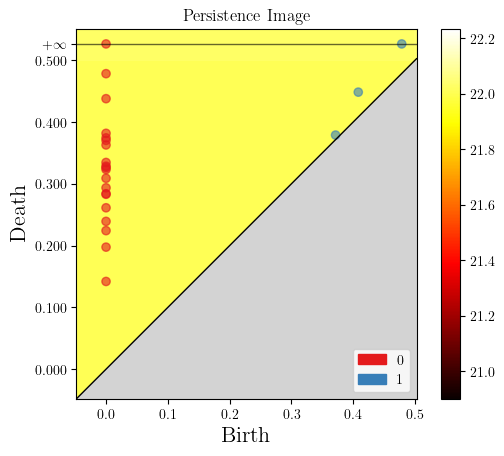

In [7]:
#28
import numpy as np
from gudhi import RipsComplex
from gudhi.persistence_graphical_tools import plot_persistence_diagram
from gudhi.representations import Landscape, PersistenceImage
import matplotlib.pyplot as plt

# Vietoris-Rips Complex
def vietoris_rips_complex(points, epsilon, max_dimension=3):
    rips = RipsComplex(points=points, max_edge_length=epsilon)
    return rips.create_simplex_tree(max_dimension=max_dimension)

# Compute Persistence Diagram
def compute_persistence_diagram(simplex_tree):
    persistence = simplex_tree.persistence()
    plot_persistence_diagram(persistence)
    return np.array(simplex_tree.persistence_intervals_in_dimension(1))  # Return as NumPy array

# Filter Invalid Persistence Pairs
def filter_invalid_pairs(diagram):
    return diagram[np.isfinite(diagram[:, 0]) & np.isfinite(diagram[:, 1]) & (diagram[:, 0] < diagram[:, 1])]

# Compute Persistence Landscape
def compute_persistence_landscape(diagram, resolution=100, num_landscapes=5):
    landscape = Landscape(resolution=resolution, num_landscapes=num_landscapes)
    landscape.fit([diagram])
    return landscape.transform([diagram])[0]

# Compute Persistence Image
def compute_persistence_image(diagram, pixel_size=(50, 50)):
    pim = PersistenceImage(resolution=pixel_size)
    pim.fit([diagram])
    return pim.transform([diagram])[0]

# Persistent Homology Algorithm
def persistent_homology_algorithm(points, epsilon):
    simplex_tree = vietoris_rips_complex(points, epsilon)
    persistence_diagram = compute_persistence_diagram(simplex_tree)
    
    # Filter invalid pairs
    filtered_diagram = filter_invalid_pairs(persistence_diagram)
    if len(filtered_diagram) == 0:
        print("No valid persistence pairs found.")
        return None, None, None
    
    persistence_landscape = compute_persistence_landscape(filtered_diagram)
    persistence_image = compute_persistence_image(filtered_diagram)
    
    return filtered_diagram, persistence_landscape, persistence_image

# Example Use Case
points = np.random.rand(20, 3)  # Randomly generated data points
epsilon = 0.5  # Proximity parameter for Rips complex

# Compute persistence outputs
diagram, landscape, image = persistent_homology_algorithm(points, epsilon)
image_reshaped = images.reshape((50, 50))

# Outputs for demonstration
if diagram is not None:
    print("Filtered Persistence Diagram:", diagram)
    print("Persistence Landscape Shape:", landscape.shape)
    print("Persistence Image Shape:", image_reshaped.shape)

    # Visualize Persistence Image
    plt.imshow(image_reshaped, cmap="hot", interpolation="nearest")
    plt.title("Persistence Image")
    plt.colorbar()
    plt.show()
else:
    print("No valid persistent features detected.")

Analyzing data batch 1


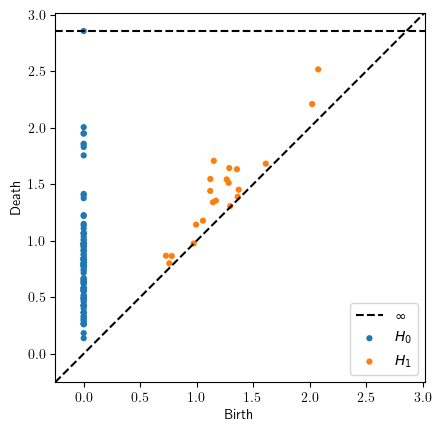

Dimension 0: Max Landscape Value: 0.0
Dimension 1: Max Landscape Value: 0.0
Analyzing data batch 2


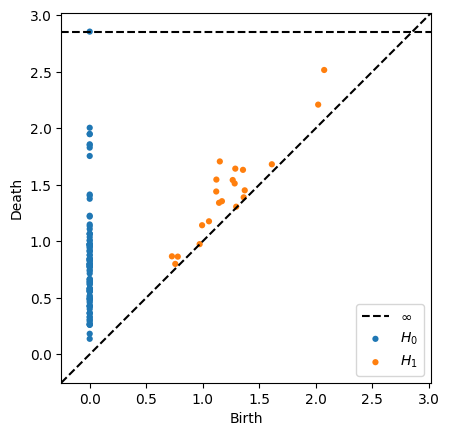

Dimension 0: Max Landscape Value: 0.0
Dimension 1: Max Landscape Value: 0.0
Analyzing data batch 3


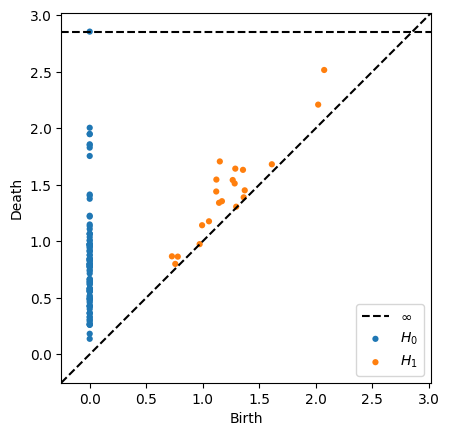

Dimension 0: Max Landscape Value: 0.0
Dimension 1: Max Landscape Value: 0.0
Analyzing data batch 4


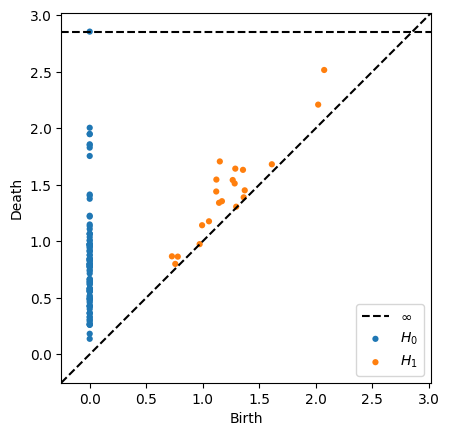

Dimension 0: Max Landscape Value: 0.0
Dimension 1: Max Landscape Value: 0.0
Analyzing data batch 5


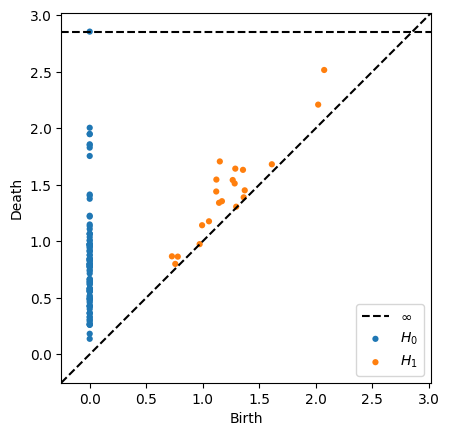

Dimension 0: Max Landscape Value: 0.0
Dimension 1: Max Landscape Value: 0.0


In [8]:
#29
import numpy as np
from sklearn import datasets
from ripser import ripser
from persim import plot_diagrams

# Construct Point Cloud from Financial Data
def construct_point_cloud(data):
    """
    Transform raw financial data into a point cloud for TDA.
    :param data: High-dimensional financial data.
    :return: Point cloud.
    """
    return np.array(data)

# Vietoris-Rips Complex and Persistence Diagram
def vietoris_rips_complex(point_cloud, max_dim=1):
    """
    Calculate the Vietoris-Rips complex for a given point cloud.
    :param point_cloud: The point cloud data.
    :param max_dim: Maximal dimension of homology to compute.
    :return: Persistence diagrams.
    """
    result = ripser(point_cloud, maxdim=max_dim)
    plot_diagrams(result['dgms'], show=True)
    return result['dgms']

# Persistence Landscape Placeholder
def persistence_landscape(diagrams, resolution=100):
    """
    Convert persistence diagrams to persistence landscapes.
    :param diagrams: Persistence diagrams.
    :param resolution: Resolution for persistence landscapes.
    :return: Placeholder for persistence landscapes.
    """
    landscapes = []
    for dim, diagram in enumerate(diagrams):
        if len(diagram) > 0:
            # Simple example: compute max landscape value for each diagram
            landscapes.append(
                np.array([
                    np.clip(birth - death, 0, np.inf)
                    for birth, death in diagram if np.isfinite(death)
                ])
            )
    return landscapes

# Real-time HFT Pattern Recognition Algorithm
def analyze_hft_patterns(data_stream):
    """
    Real-time topological pattern recognition algorithm for HFT.
    :param data_stream: Incoming financial data stream.
    """
    for idx, data in enumerate(data_stream):
        print(f"Analyzing data batch {idx + 1}")
        point_cloud = construct_point_cloud(data)
        diagrams = vietoris_rips_complex(point_cloud)
        landscapes = persistence_landscape(diagrams)
        
        # Pattern recognition logic goes here
        # Example: print landscape stats for illustration
        for dim, landscape in enumerate(landscapes):
            if landscape.size > 0:
                print(f"Dimension {dim}: Max Landscape Value: {landscape.max()}")

# Example financial data simulated as random data points
financial_data = datasets.make_blobs(n_samples=100, n_features=3, centers=3)[0]

# Simulate a data stream with multiple time frames
data_stream = [financial_data for _ in range(5)]

# Run the pattern recognition over the data stream
analyze_hft_patterns(data_stream)

In [9]:
#30
import numpy as np
import gudhi as gd

# Vietoris-Rips Complex Construction
def vietoris_rips_complex(point_cloud, max_edge_length):
    """
    Construct a Vietoris-Rips complex for the given point cloud.
    :param point_cloud: List of points representing the market data.
    :param max_edge_length: Maximum edge length for simplices in the complex.
    :return: Simplex tree of the Vietoris-Rips complex.
    """
    rips_complex = gd.RipsComplex(points=point_cloud, max_edge_length=max_edge_length)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    return simplex_tree

# Compute Persistence Diagram
def persistence_diagram(simplex_tree):
    """
    Compute the persistence diagram of a given simplex tree.
    :param simplex_tree: The Vietoris-Rips complex's simplex tree.
    :return: Persistence diagram as a list of (birth, death) pairs.
    """
    simplex_tree.compute_persistence()
    return simplex_tree.persistence()

# Filter Persistence Diagram
def filter_persistence_diagram(persistence_pairs, threshold):
    """
    Filter the persistence diagram to retain significant features.
    :param persistence_pairs: The persistence diagram containing birth and death pairs.
    :param threshold: Minimum persistence (death-birth) threshold for filtering.
    :return: Filtered persistence diagram.
    """
    return [(b, d) for dim, (b, d) in persistence_pairs if d - b >= threshold and np.isfinite(d)]

# Example point cloud data
np.random.seed(42)  # Ensure reproducibility
points = np.random.rand(50, 3)  # 50 points in 3-dimensional space

# Parameters
max_edge_length = 0.5
persistence_threshold = 0.05

# Construct Vietoris-Rips complex and calculate persistence diagram
simplex_tree = vietoris_rips_complex(points, max_edge_length)
persistence_pairs = persistence_diagram(simplex_tree)

# Filter out noise from the persistence diagram
filtered_diagram = filter_persistence_diagram(persistence_pairs, persistence_threshold)

# Print filtered persistence pairs
print("Filtered Persistence Diagram:", filtered_diagram)

Filtered Persistence Diagram: [(0.33185723901943126, 0.455989129459094), (0.3395031140523006, 0.4466945141407862), (0.2822085986176317, 0.38094201456499954), (0.31269488131915885, 0.38699499422345485), (0.0, 0.3196175010883712), (0.0, 0.2874123181812842), (0.0, 0.28005229777459995), (0.0, 0.27040859600776207), (0.0, 0.2530167170850761), (0.0, 0.2490177667810294), (0.0, 0.2485330726069267), (0.0, 0.24282581850595256), (0.0, 0.24185582323337285), (0.0, 0.2390600139174506), (0.0, 0.23825560338363294), (0.0, 0.23616443763999104), (0.0, 0.23167140207086015), (0.0, 0.23026618791147643), (0.0, 0.22960863748647095), (0.0, 0.22746836743931018), (0.0, 0.22700934369001224), (0.0, 0.22619337396596154), (0.0, 0.22610825748492572), (0.0, 0.21805125275954587), (0.0, 0.20019831824679965), (0.0, 0.1973137308122426), (0.0, 0.19581391512431517), (0.0, 0.19230910487198738), (0.0, 0.18768532740396301), (0.0, 0.18757437112425462), (0.0, 0.18563814001948248), (0.0, 0.18172955054271656), (0.0, 0.1790571737632

In [10]:
#31
import numpy as np
import gudhi as gd

# Compute Persistence Diagram
def compute_persistence_diagram(point_cloud, max_edge_length=5.0, max_dimension=2):
    """
    Calculate the persistence diagram for a given point cloud.
    :param point_cloud: Collection of points representing data.
    :param max_edge_length: Maximum edge length for simplices in the Rips complex.
    :param max_dimension: Maximum dimension of homology to compute.
    :return: Persistence diagram and simplex tree.
    """
    rips_complex = gd.RipsComplex(points=point_cloud, max_edge_length=max_edge_length)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)
    persistence_diagram = simplex_tree.persistence()
    return persistence_diagram, simplex_tree

# Filter Anomalies in the Persistence Diagram
def filter_anomalies(persistence_diagram, threshold=0.1):
    """
    Identify anomalies in the persistence diagram based on persistence length.
    :param persistence_diagram: Computed persistence diagram.
    :param threshold: Sensitivity threshold for anomaly detection.
    :return: List of persistence pairs marked as anomalies.
    """
    anomalies = []
    for dimension, (birth, death) in persistence_diagram:
        persistence_length = death - birth
        if persistence_length > threshold:
            anomalies.append((dimension, (birth, death)))
    return anomalies

# Compute Betti Numbers
def compute_betti_numbers(simplex_tree):
    """
    Calculate Betti numbers for a given simplex tree.
    :param simplex_tree: SimplexTree structure.
    :return: List of Betti numbers.
    """
    simplex_tree.compute_persistence()  # Ensure persistence computation is called
    return simplex_tree.betti_numbers()


# Generate a random point cloud
np.random.seed(42)  # Ensure reproducibility
point_cloud = np.random.rand(100, 3)  # 100 points in 3-dimensional space

# Compute the persistence diagram
persistence_diagram, simplex_tree = compute_persistence_diagram(point_cloud)

# Identify anomalies in the persistence diagram
anomalies = filter_anomalies(persistence_diagram, threshold=0.1)

# Compute the Betti numbers
betti_numbers = compute_betti_numbers(simplex_tree)

# Output Results
print("Persistence Diagram:", persistence_diagram)
print("Anomalies Detected:", anomalies)
print("Betti Numbers:", betti_numbers)

Persistence Diagram: [(1, (0.24342687919388206, 0.38940079443715175)), (1, (0.23616443763999104, 0.38094201456499954)), (1, (0.24591051308575995, 0.36725745149423566)), (1, (0.23409469287861234, 0.3506970299819989)), (1, (0.2314854828838116, 0.32516347375505444)), (1, (0.21931891175582358, 0.306424688220047)), (1, (0.2485330726069267, 0.331519800787131)), (1, (0.2822085986176317, 0.342136068954585)), (1, (0.24291970780774214, 0.3027730992446192)), (1, (0.233885749709106, 0.2911521711235226)), (1, (0.2390600139174506, 0.2945052053644773)), (1, (0.2530167170850761, 0.3084295063231558)), (1, (0.18768532740396301, 0.2410640843215225)), (1, (0.23625414730602196, 0.2874123181812842)), (1, (0.2297247039931106, 0.2753714958993603)), (1, (0.25463317895866433, 0.3001926500348536)), (1, (0.22583368835897105, 0.2681282913356235)), (1, (0.27528958225342787, 0.3167662476003635)), (1, (0.25795286416579627, 0.29426841312574964)), (1, (0.24946677219608387, 0.28507041147659956)), (1, (0.2534242704915210

In [11]:
#32
import numpy as np
import gudhi as gd

# Time-Delay Embedding
def time_delay_embedding(time_series, delay, dimension):
    """
    Perform time-delay embedding for a given time series.
    :param time_series: Input financial time series data.
    :param delay: Time delay for embedding.
    :param dimension: Embedding dimension.
    :return: Embedded point cloud.
    """
    n_points = len(time_series) - (dimension - 1) * delay
    if n_points <= 0:
        raise ValueError("Time series is too short for the specified embedding.")
    return np.array([time_series[i:i + dimension * delay:delay] for i in range(n_points)])

# Persistent Homology
def compute_persistent_homology(point_cloud, max_dimension=2):
    """
    Compute the persistent homology of a point cloud.
    :param point_cloud: Point cloud data from time-delay embedding.
    :param max_dimension: Maximum homology dimension to compute.
    :return: Persistence diagram.
    """
    rips_complex = gd.RipsComplex(points=point_cloud, max_edge_length=20.0)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)
    return simplex_tree.persistence()

# Persistence Landscape
def calculate_persistence_landscape(persistence_diagram, x_values):
    """
    Calculate the persistence landscape from a persistence diagram.
    :param persistence_diagram: List of birth-death pairs.
    :param x_values: Range of x_values to calculate landscape.
    :return: Persistence landscape.
    """
    landscape = np.zeros_like(x_values)
    for _, (birth, death) in persistence_diagram:
        midpoint = (birth + death) / 2
        slope = np.maximum(0, np.minimum(x_values - birth, death - x_values))
        landscape = np.maximum(landscape, slope)
    return landscape

def compute_volatility_measure(landscape, x_values):
    """
    Computes the area under the persistence landscape using trapezoidal integration.
    :param landscape: Persistence landscape values.
    :param x_values: Corresponding x values.
    :return: Volatility measure.
    """
    return np.trapz(landscape, x_values)

# Wasserstein Distance
def wasserstein_distance(pd1, pd2, p=2):
    """
    Calculate the Wasserstein distance between two persistence diagrams.
    :param pd1: First persistence diagram.
    :param pd2: Second persistence diagram.
    :param p: The order of the Wasserstein distance.
    :return: Wasserstein distance.
    """
    return gd.bottleneck_distance(pd1, pd2)

# Example Financial Time Series Data
time_series_example = (
    np.sin(np.linspace(0, 10, 100)) +
    np.random.normal(0, 0.1, 100)
)

# Parameters for Time-Delay Embedding
delay = 5
dimension = 3

# Perform Time-Delay Embedding
embedded_point_cloud = time_delay_embedding(time_series_example, delay, dimension)

# Compute Persistent Homology
persistence_diagram = compute_persistent_homology(embedded_point_cloud)

# Define x Values for Persistence Landscape
x_vals = np.linspace(0, max(embedded_point_cloud.flatten()), 100)

# Calculate Persistence Landscape
land = calculate_persistence_landscape(persistence_diagram, x_vals)

# Compute Volatility Measure
volatility = compute_volatility_measure(land, x_vals)

# Compute Wasserstein Distance for Demonstration
dim_0_pairs = [pair for dim, pair in persistence_diagram if dim == 0 and pair[1]-pair[0] < np.inf]
dim_1_pairs = [pair for dim, pair in persistence_diagram if dim == 1 and pair[1]-pair[0] < np.inf]
dist = wasserstein_distance(dim_0_pairs, dim_1_pairs)

# Results
print("Volatility Measure:", volatility)
print("Self Wasserstein Distance:", dist)

Volatility Measure: 0.6909196334435582
Self Wasserstein Distance: 0.401859181567353


Persistence Diagram: [(1, (0.1356140648829941, 0.2509620101009513)), (1, (0.14957335353966217, 0.25667293605245456)), (1, (0.18975191239416955, 0.2694656245278215)), (1, (0.13776346626416194, 0.20505538506725562)), (1, (0.14663309117313544, 0.20966636373526543)), (1, (0.14270005644751704, 0.20146684316285363)), (1, (0.14682977064146674, 0.20280773104275363)), (1, (0.16805793042304065, 0.20664343174753444)), (1, (0.10785889218253365, 0.14098493504803508)), (1, (0.14834956650251854, 0.1738310234958087)), (1, (0.0931130770358236, 0.11576295629731133)), (1, (0.14243908418039758, 0.15952773597697517)), (1, (0.16350276064959582, 0.17842942543181395)), (1, (0.16174974018068447, 0.16889640839718478)), (1, (0.1907685725088997, 0.19490280082776956)), (1, (0.08662242282692255, 0.09058442531519634)), (1, (0.10815380374141789, 0.11038949146730667)), (1, (0.09370365575961336, 0.0954758544840567)), (1, (0.1097881294784111, 0.10979227300098258)), (0, (0.0, inf)), (0, (0.0, 0.16833695166252222)), (0, (

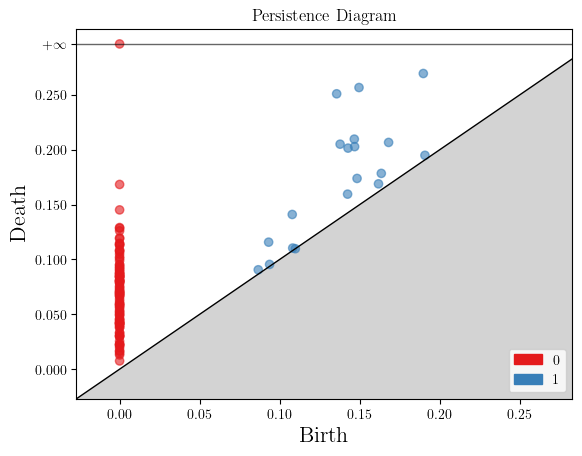

Mapper Clusters: {0: [[0, 2, 3, 4, 5, 6, 7, 8, 1, 9, 11, 10]], 1: [[0, 3, 7, 8, 9, 10, 15, 17, 20, 18, 5, 1, 2, 4, 6, 11, 13, 14, 12, 16, 22, 19, 21]], 2: [[0, 1, 2, 4, 6, 7, 15, 19, 5, 17, 11, 8, 9, 13, 10, 14, 18, 12, 3, 16, 21, 26, 20, 22, 23, 24, 28, 30, 25, 31, 27, 29]], 3: [[0, 2, 5, 6, 9, 10, 14, 7, 1, 3, 8, 12, 4, 11, 13, 17, 18, 16, 15, 20, 21, 23, 22, 19]], 4: [[0, 1, 3, 5, 6, 7, 8, 10, 12, 4, 2, 9, 13, 11]]}
Density-Based Clusters Persistence Diagram: [(1, (0.1356140648829941, 0.2509620101009513)), (1, (0.14957335353966217, 0.25667293605245456)), (1, (0.18975191239416955, 0.2694656245278215)), (1, (0.13776346626416194, 0.20505538506725562)), (1, (0.14663309117313544, 0.20966636373526543)), (1, (0.14270005644751704, 0.20146684316285363)), (1, (0.14682977064146674, 0.20280773104275363)), (1, (0.16805793042304065, 0.20664343174753444)), (1, (0.10785889218253365, 0.14098493504803508)), (1, (0.14834956650251854, 0.1738310234958087)), (1, (0.0931130770358236, 0.11576295629731133))

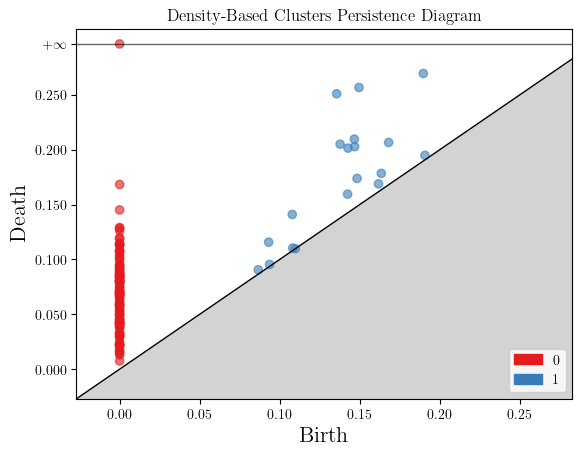

In [12]:
#33
import numpy as np
from sklearn.neighbors import NearestNeighbors
import gudhi as gd
import matplotlib.pyplot as plt

# Calculate Persistent Homology
def calculate_persistent_homology(point_cloud, max_dim=2, max_edge_length=1.0):
    """
    Calculate persistent homology for a given point cloud.
    :param point_cloud: The data set as a list of points.
    :param max_dim: Maximum dimension of homology features to compute.
    :param max_edge_length: Maximum edge length for simplices in the Rips complex.
    :return: Persistence diagram.
    """
    rips_complex = gd.RipsComplex(points=point_cloud, max_edge_length=max_edge_length)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dim)
    return simplex_tree.persistence()

# Mapper Algorithm
def mapper_algorithm(data, filter_function, cover_intervals, overlap):
    """
    Implement Mapper algorithm for data clustering.
    :param data: Input data as a point cloud.
    :param filter_function: Function to filter the data.
    :param cover_intervals: Number of intervals for covering the data space.
    :param overlap: Overlap percentage between intervals.
    :return: Dictionary representing clusters.
    """
    f_values = filter_function(data)
    min_val, max_val = np.min(f_values), np.max(f_values)
    interval_length = (max_val - min_val) / cover_intervals
    clusters = {}

    for i in range(cover_intervals):
        start = min_val + i * interval_length * (1 - overlap)
        end = start + interval_length
        # Filter points into interval
        interval_points = data[(f_values >= start) & (f_values <= end)]
        if len(interval_points) == 0:
            continue

        # Create graph connection among points (simplified to nearest neighbors)
        nn = NearestNeighbors(n_neighbors=min(10, len(interval_points))).fit(interval_points)
        graph = nn.kneighbors_graph(interval_points).toarray()
        # Extract connected components
        clusters[i] = extract_connected_components(graph)

    return clusters

def extract_connected_components(graph):
    """
    Extract connected components from a graph connection array.
    :param graph: Graph as adjacency matrix.
    :return: List of connected components as node index lists.
    """
    def dfs(node, visited, component):
        component.append(node)
        visited.add(node)
        for neighbor, connected in enumerate(graph[node]):
            if connected and neighbor not in visited:
                dfs(neighbor, visited, component)

    visited = set()
    components = []
    for node in range(graph.shape[0]):
        if node not in visited:
            component = []
            dfs(node, visited, component)
            components.append(component)
    return components

# Density-Based Topological Clustering
def density_based_topological_clustering(data, density_function, threshold):
    """
    Apply density-based topological clustering.
    :param data: Input data as a list of points.
    :param density_function: Function to compute density at each data point.
    :param threshold: Density threshold for filtering.
    :return: Persistence diagram of dense points.
    """
    densities = density_function(data)
    dense_points = data[densities >= threshold]
    return calculate_persistent_homology(dense_points)

# Example Usage
if __name__ == "__main__":
    # Generate random points for demonstration
    points = np.random.rand(100, 2)

    # Persistent Homology Example
    persistence_diagram = calculate_persistent_homology(points, max_dim=2, max_edge_length=1.0)
    print("Persistence Diagram:", persistence_diagram)

    # Visualize Persistence Diagram
    gd.plot_persistence_diagram(persistence_diagram)
    plt.title("Persistence Diagram")
    plt.show()

    # Mapper Example
    filter_func = lambda x: np.sum(x, axis=1)  # Simplified filter function
    clusters = mapper_algorithm(points, filter_func, cover_intervals=5, overlap=0.1)
    print("Mapper Clusters:", clusters)

    # Density-Based Clustering Example
    density_func = lambda x: np.array([np.sum(np.exp(-np.linalg.norm(x - xi, axis=1)**2)) for xi in x])
    clusters_by_density = density_based_topological_clustering(points, density_func, threshold=5)
    print("Density-Based Clusters Persistence Diagram:", clusters_by_density)

    # Visualize Persistence Diagram for Dense Points
    gd.plot_persistence_diagram(clusters_by_density)
    plt.title("Density-Based Clusters Persistence Diagram")
    plt.show()

Persistence Intervals: [[0.15049787 0.17427972]
 [0.15456162 0.18066515]
 [0.19389378 0.19712999]
 [0.21200701 0.21857208]
 [0.20275487 0.21930106]
 [0.21297108 0.23741703]
 [0.23206627 0.25174026]
 [0.25680905 0.27147936]
 [0.26587663 0.27269908]
 [0.26896698 0.27296622]
 [0.27392604 0.27861131]
 [0.24093121 0.27887266]
 [0.22173811 0.28377796]
 [0.2237971  0.28960961]
 [0.28154132 0.29490122]
 [0.27192915 0.29658729]
 [0.24913828 0.29827251]
 [0.20493319 0.30670374]
 [0.2155672  0.30913981]
 [0.311683   0.3194152 ]
 [0.31496867 0.32085426]
 [0.24469653 0.32135433]
 [0.2765107  0.32210778]
 [0.23615007 0.32741576]
 [0.23997105 0.3326015 ]
 [0.30795746 0.34088445]
 [0.20826    0.35281179]
 [0.36048951 0.3634622 ]
 [0.26746733 0.36431286]
 [0.24444735 0.37076278]
 [0.22866668 0.40407322]
 [0.33793561 0.43107997]]


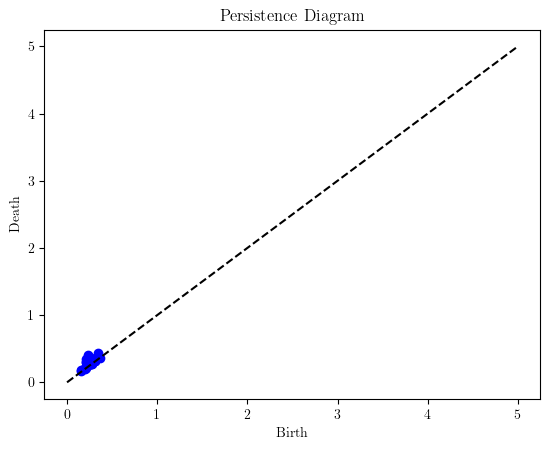

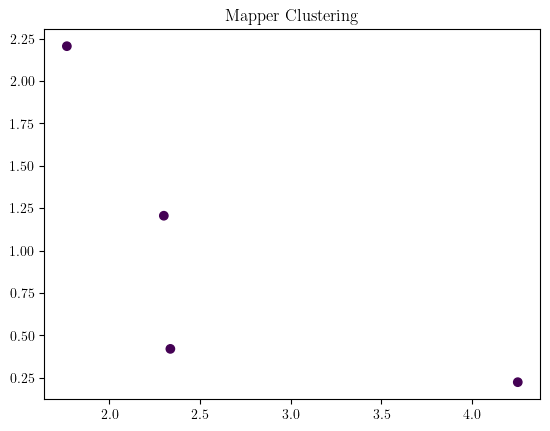

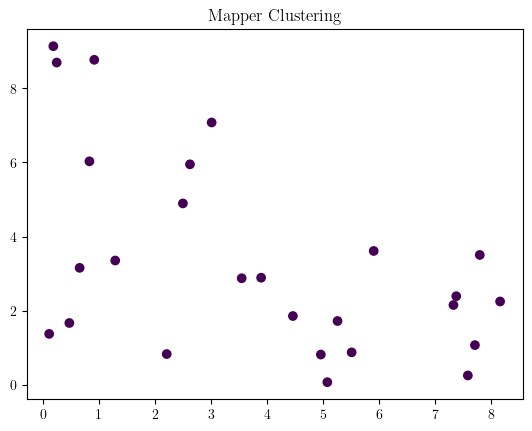

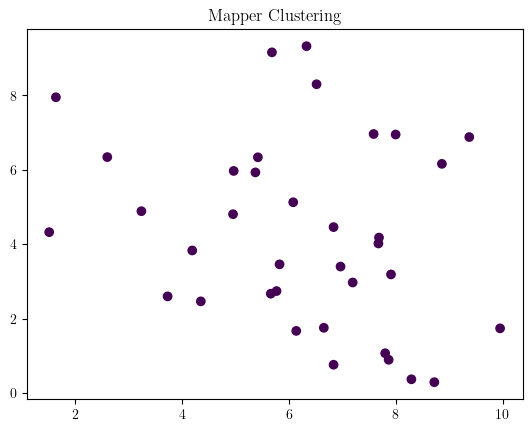

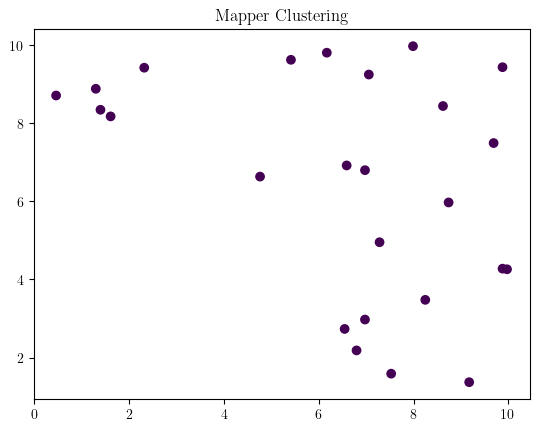

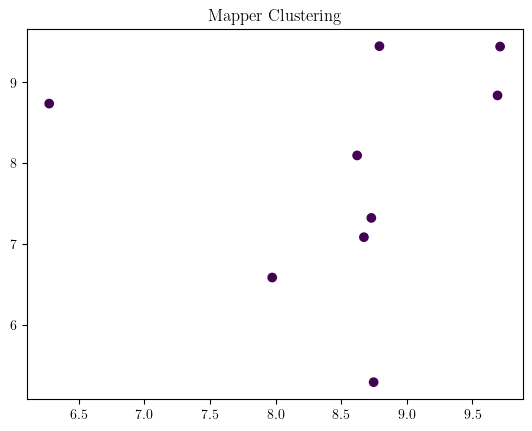

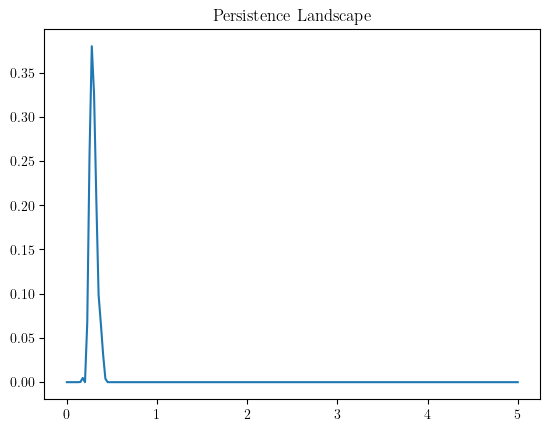

In [13]:
#34
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import gudhi

# Persistent Homology
def compute_persistent_homology(point_cloud):
    """
    Compute persistent homology for a given point cloud.
    :param point_cloud: Input point cloud data.
    :return: Persistence diagram.
    """
    rips_complex = gudhi.RipsComplex(points=point_cloud, max_edge_length=5.0)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    simplex_tree.persistence()
    return simplex_tree.persistence_intervals_in_dimension(1)

def plot_persistence_diagram(diagram):
    """
    Plot the persistence diagram from birth-death pairs.
    :param diagram: Persistence intervals.
    """
    if len(diagram) == 0:
        print("No persistence intervals to plot.")
        return

    plt.figure()
    plt.scatter([birth for birth, death in diagram], 
                [death for birth, death in diagram], c='blue')
    plt.plot([0, max(max(death for _, death in diagram), 5)], 
             [0, max(max(death for _, death in diagram), 5)], 'k--')
    plt.xlabel("Birth")
    plt.ylabel("Death")
    plt.title("Persistence Diagram")
    plt.show()

# Mapper Algorithm
def mapper_algorithm(data, filter_function, cover_intervals, cluster_algo=DBSCAN(eps=0.5, min_samples=5)):
    """
    Implement the Mapper algorithm for data visualization.
    :param data: High-dimensional dataset.
    :param filter_function: Filter function to segment data.
    :param cover_intervals: Overlapping intervals for mapping.
    :param cluster_algo: Clustering algorithm to apply.
    :return: Simplicial complex graph for visualization.
    """
    filtered_data = filter_function(data)
    interval_overlap = np.linspace(min(filtered_data), max(filtered_data), cover_intervals + 1)
    graphs = []
    
    for i in range(cover_intervals):
        mask = (filtered_data >= interval_overlap[i]) & (filtered_data <= interval_overlap[i + 1])
        sub_data = data[mask]
        if len(sub_data) > 0:
            clusters = cluster_algo.fit_predict(sub_data)
            graphs.append((sub_data, clusters))
    return graphs

def filter_data(data):
    """
    Example filter function for the Mapper algorithm.
    :param data: Input data to filter.
    :return: Filtered data.
    """
    return np.sum(data, axis=1)

# Persistence Landscape
def compute_persistence_landscape(diagram, x_range):
    """
    Compute the persistence landscape.
    :param diagram: Persistence diagram.
    :param x_range: Range over which to compute the landscape.
    :return: Persistence landscape values.
    """
    landscape = np.zeros_like(x_range, dtype=float)
    for birth, death in diagram:
        landscape += np.maximum(0, np.minimum(x_range - birth, death - x_range))
    return landscape

# Generate random 3D point cloud
point_cloud = np.random.rand(100, 3)

# Compute Persistent Homology
persistence_intervals = compute_persistent_homology(point_cloud)
print("Persistence Intervals:", persistence_intervals)

# Plot Persistence Diagram
plot_persistence_diagram(persistence_intervals)

# Mapper Algorithm
data = np.random.rand(100, 3) * 10
graphs = mapper_algorithm(data, filter_data, cover_intervals=5)
for graph in graphs:
    sub_data, clusters = graph
    plt.scatter(sub_data[:, 0], sub_data[:, 1], c=clusters)
    plt.title("Mapper Clustering")
    plt.show()

# Compute and Plot Persistence Landscape
x_range = np.linspace(0, 5, 200)
landscape = compute_persistence_landscape(persistence_intervals, x_range)
plt.plot(x_range, landscape)
plt.title("Persistence Landscape")
plt.show()

In [14]:
#35
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Calculate Persistence Diagram
def calculate_persistence_diagram(data, threshold):
    ''' 
    Calculate the persistence diagram for financial data.
    :param data: Input data for which to compute persistent homology.
    :param threshold: Persistence threshold to distinguish significant features.
    :return: List of significant features based on persistence.
    '''
    # Placeholder - replace with actual TDA library call
    persistence_diagram = [(0.1, 0.5), (0.4, 0.8), (0.6, 0.7)]  # Dummy data

    # Filter significant features based on persistence threshold
    significant_features = [(b, d) for b, d in persistence_diagram if (d - b) >= threshold]
    return significant_features

# Compute Betti Numbers
def compute_betti_numbers(data, epsilon_range):
    ''' 
    Compute Betti numbers over a range of epsilon (scale) values.
    :param data: Input data for Betti calculation.
    :param epsilon_range: Range of epsilon values to evaluate.
    :return: Betti curve.
    '''
    betti_curve = []
    for epsilon in epsilon_range:
        # Placeholder - in practice, compute rank of homology groups
        betti_number = np.random.randint(0, 10)  # Dummy Betti number
        betti_curve.append(betti_number)
    return np.array(betti_curve)

# Extract Trading Signals
def extract_trading_signals(betti_curve, weights):
    ''' 
    Map Betti curve characteristics to trading signals.
    :param betti_curve: Betti numbers over time.
    :param weights: Feature weights for signal calculation.
    :return: Array of trading signals.
    '''
    trading_signals = []
    for betti in betti_curve:
        signal_strength = np.dot(weights, betti)
        trading_signals.append(signal_strength)
    return np.array(trading_signals)

# TDA-Based Trading Strategy
def tda_based_trading_strategy(time_series_data, threshold, epsilon_range, weights):
    ''' 
    Implement a TDA-driven trading algorithm.
    :param time_series_data: Financial time series data for analysis.
    :param threshold: Persistence threshold for feature selection.
    :param epsilon_range: Epsilon values for Betti computation.
    :param weights: Weights for signal extraction.
    :return: Computed trading signals.
    '''
    # Normalize data
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(time_series_data.reshape(-1, 1)).flatten()

    # Compute persistent homology
    significant_features = calculate_persistence_diagram(normalized_data, threshold)

    # Calculate Betti numbers
    betti_curve = compute_betti_numbers(normalized_data, epsilon_range)

    # Generate trading signals
    signals = extract_trading_signals(betti_curve, weights)

    return signals

# Example usage with dummy data
time_series_data = np.random.rand(100)  # Dummy financial time series data
epsilon_range = np.linspace(0, 1, 50)  # Range of epsilon values
weights = np.random.rand(50)  # Dummy weights
threshold = 0.1  # Persistence threshold

signals = tda_based_trading_strategy(time_series_data, threshold, epsilon_range, weights)

print("Generated Trading Signals:", signals)

Generated Trading Signals: [[4.87932628 1.68447896 0.91058958 ... 0.90488476 4.27192547 2.46138928]
 [6.83105679 2.35827054 1.27482541 ... 1.26683867 5.98069565 3.445945  ]
 [5.85519153 2.02137475 1.09270749 ... 1.08586172 5.12631056 2.95366714]
 ...
 [3.90346102 1.34758317 0.72847166 ... 0.72390781 3.41754037 1.96911143]
 [2.92759577 1.01068738 0.54635375 ... 0.54293086 2.56315528 1.47683357]
 [8.7827873  3.03206213 1.63906124 ... 1.62879257 7.68946584 4.43050071]]


In [15]:
#36
import numpy as np
from scipy.spatial import distance_matrix
from itertools import combinations

# Compute Persistence Diagram
def compute_persistence_diagram(data, max_dim=1):
    ''' 
    Simplified computation of persistence diagrams for a set of points.
    :param data: Numpy array of point cloud data.
    :param max_dim: Maximum homology dimension to consider.
    :return: List of persistence pairs (birth, death).
    '''
    dist_matrix = distance_matrix(data, data)
    n = len(data)
    persistence_pairs = []
    for dim in range(max_dim + 1):
        pairs = []
        for subset in combinations(range(n), dim + 2):
            sub_dist = dist_matrix[np.ix_(subset, subset)]
            R = np.max(sub_dist)
            pairs.append((R, subset))
        persistence_pairs.append(pairs)
    return persistence_pairs

# Compute Betti Numbers
def betti_numbers(persistence_diagram, threshold):
    ''' 
    Calculate Betti numbers from persistence diagrams at a given threshold.
    :param persistence_diagram: List of persistence pairs from the TDA computation.
    :param threshold: The epsilon threshold for filtration.
    :return: List of Betti numbers for each dimension.
    '''
    betti = []
    for dim, pairs in enumerate(persistence_diagram):
        count = sum(1 for (b, _) in pairs if b <= threshold)
        betti.append(count)
    return betti

# Compute Risk Indicator from Betti Numbers
def risk_indicator_from_betti(data, scale, risk_threshold):
    ''' 
    Compute risk indicators based on Betti number fluctuations.
    :param data: Input financial data.
    :param scale: Scale parameter to analyze.
    :param risk_threshold: Risk threshold for significant features.
    :return: Risk indicator value.
    '''
    PD = compute_persistence_diagram(data)
    bettis = betti_numbers(PD, scale)
    return any(b > risk_threshold for b in bettis)

# TDA-Based Risk Management Strategy
def tda_risk_management_strategy(data, scales, risk_threshold):
    ''' 
    TDA-Based Risk Management Strategy.
    :param data: Financial data set to analyze.
    :param scales: List of scales to evaluate.
    :param risk_threshold: Threshold to determine significant risk.
    :return: Risk assessment.
    '''
    risk_metrics = []
    for scale in scales:
        indicator = risk_indicator_from_betti(data, scale, risk_threshold)
        risk_metrics.append((scale, indicator))
    return risk_metrics

# Example financial data point set
financial_data = np.random.rand(10, 3)  # Simulating a point cloud of size 10 in 3D

# Risk management parameters
scales = [0.1, 0.2, 0.3]
risk_threshold = 5

# Execute risk management strategy
risks = tda_risk_management_strategy(financial_data, scales, risk_threshold)
for scale, risk in risks:
    print(f"Scale: {scale}, Risk Indicator: {risk}")

Scale: 0.1, Risk Indicator: False
Scale: 0.2, Risk Indicator: False
Scale: 0.3, Risk Indicator: False


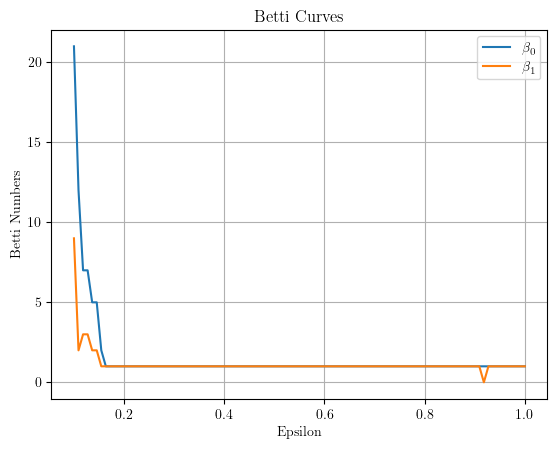

In [16]:
#37
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components

# Function to compute Betti numbers for a given point cloud and scale parameter epsilon
def compute_betti_numbers(points, epsilon):
    '''
    Calculate Betti numbers for a given point cloud and scale parameter epsilon.
    :param points: List of points representing market data.
    :param epsilon: Scale parameter for building simplicial complexes.
    :return: Betti numbers (beta_0, beta_1).
    '''
    # Create a distance matrix
    dist_matrix = np.linalg.norm(points[:, np.newaxis] - points, axis=2)
    
    # Construct adjacency matrix for epsilon distance
    adj_matrix = (dist_matrix <= epsilon).astype(int)
    np.fill_diagonal(adj_matrix, 0)  # No self-loops
    
    # Convert to CSR matrix for connected components calculation
    graph = csr_matrix(adj_matrix)
    
    # Calculate connected components
    n_components, labels = connected_components(csgraph=graph, directed=False, return_labels=True)
    
    # Betti_0 is the number of connected components
    beta_0 = n_components
    
    # Betti_1 can be approximated from the number of cycles in the graph
    # Calculating rank of the adjacency matrix
    rank = np.linalg.matrix_rank(adj_matrix)
    n_points = len(points)
    
    # Betti_1 calculation (Euler characteristic approximation)
    beta_1 = rank - n_points + n_components
    
    return beta_0, beta_1

# Function to plot Betti curves for the given time series data across different epsilon values
def plot_betti_curve(time_series_data, epsilon_values):
    '''
    Plot Betti curves for the given time series data across different epsilon values.
    :param time_series_data: 2D array where each row is a point in the market data.
    :param epsilon_values: List of epsilon values for constructing Betti curves.
    '''
    beta_0_curve = []
    beta_1_curve = []
    
    for epsilon in epsilon_values:
        beta_0, beta_1 = compute_betti_numbers(time_series_data, epsilon)
        beta_0_curve.append(beta_0)
        beta_1_curve.append(beta_1)
    
    # Plot Betti curves for both beta_0 and beta_1
    plt.plot(epsilon_values, beta_0_curve, label=r'$\beta_0$')
    plt.plot(epsilon_values, beta_1_curve, label=r'$\beta_1$')
    plt.xlabel('Epsilon')
    plt.ylabel('Betti Numbers')
    plt.title('Betti Curves')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example of market data as a point cloud
market_data = np.random.rand(100, 2)  # 100 points in 2D, representing market conditions

# Define a range of epsilon values for persistent homology
epsilon_range = np.linspace(0.1, 1.0, 100)

# Compute and plot Betti curves
plot_betti_curve(market_data, epsilon_range)

In [17]:
#38
import numpy as np
import gudhi as gd

# Generate Vietoris-Rips filtration and compute persistence
def vietoris_rips_filtration(points, max_epsilon):
    '''
    Generate Vietoris-Rips complex and compute persistence.
    :param points: Input data points.
    :param max_epsilon: Maximum filtration parameter.
    :return: Persistence diagram.
    '''
    rips_complex = gd.RipsComplex(points=points, max_edge_length=max_epsilon)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    simplex_tree.compute_persistence()
    return simplex_tree.persistence()

# Generate Čech filtration and compute persistence
def cech_filtration(points, max_radius):
    '''
    Generate Čech complex and compute persistence.
    :param points: Input data points.
    :param max_radius: Maximum radius for creating Čech complex.
    :return: Persistence diagram.
    '''
    vietoris_rips = vietoris_rips_filtration(points, max_radius)
    return vietoris_rips  # Čech is often approximated by VR in practice

# Generate Alpha complex filtration and compute persistence
def alpha_complex_filtration(points):
    '''
    Generate Alpha complex and compute persistence.
    :param points: Input data points.
    :return: Persistence diagram.
    '''
    alpha_complex = gd.AlphaComplex(points=points)
    simplex_tree = alpha_complex.create_simplex_tree()
    simplex_tree.compute_persistence()
    return simplex_tree.persistence()

def sublevel_set_filtration(function_values, max_threshold):
    '''
    Sublevel set filtration for a given function on simplices.
    :param function_values: Scalar function values at vertices.
    :param max_threshold: Maximum threshold for the function.
    :return: Persistence diagram.
    '''
    simplex_tree = gd.SimplexTree()
    
    # Insert the points into the SimplexTree with their filtration values
    for i, value in enumerate(function_values):
        simplex_tree.insert([i], filtration=value)
    
    # Compute persistence using sublevel set filtration with lower star persistence generators
    persistence = []
    for threshold in np.linspace(min(function_values), max_threshold, num=100):
        simplex_tree.compute_persistence()
        generators = simplex_tree.lower_star_persistence_generators()
        persistence.append(generators)
    
    return simplex_tree.persistence()

# Example use-case with dummy points representing market data
points = np.random.rand(10, 2)  # Sample 10 points in 2D space
max_epsilon = 0.5  # Maximum epsilon for Vietoris-Rips

# Compute persistence diagrams for different filtration techniques
vr_persistence = vietoris_rips_filtration(points, max_epsilon)
alpha_persistence = alpha_complex_filtration(points)

# Function values for sublevel set filtration example
function_values = np.random.rand(10)
max_threshold = 1.0
sublevel_persistence = sublevel_set_filtration(function_values, max_threshold)

# Print results
print("Vietoris-Rips Persistence:", vr_persistence)
print("Alpha Complex Persistence:", alpha_persistence)
print("Sublevel Set Persistence:", sublevel_persistence)

Vietoris-Rips Persistence: [(0, (0.0, inf)), (0, (0.0, 0.46480536793550464)), (0, (0.0, 0.26493849418507914)), (0, (0.0, 0.253992603985956)), (0, (0.0, 0.2524284453259007)), (0, (0.0, 0.2340025944427716)), (0, (0.0, 0.2148191402913436)), (0, (0.0, 0.21134204544979027)), (0, (0.0, 0.15969159820110518)), (0, (0.0, 0.11790800993943203))]
Alpha Complex Persistence: [(1, (0.011588668287964093, 0.015242840091141909)), (1, (0.02549555544144013, 0.027036285011185247)), (1, (0.05885620423161901, 0.05895642449243746)), (1, (0.07046186382552438, 0.07055691401880479)), (0, (0.0, inf)), (0, (0.0, 0.05401100751541496)), (0, (0.0, 0.0175481014252643)), (0, (0.0, 0.01612806071989167)), (0, (0.0, 0.01593003000241281)), (0, (0.0, 0.013689303551487063)), (0, (0.0, 0.011536815758877992)), (0, (0.0, 0.011166365043725304)), (0, (0.0, 0.006375351634005805)), (0, (0.0, 0.0034755747019693003))]
Sublevel Set Persistence: [(0, (0.11636639788547609, inf)), (0, (0.2085105143573358, inf)), (0, (0.3046791390980408, 

In [18]:
#39
import numpy as np
from scipy.optimize import linear_sum_assignment

def wasserstein_distance(D_X, D_Y, q=2):
    '''
    Calculate the q-Wasserstein distance between two persistence
    diagrams.
    :param D_X: Persistence diagram for data X.
    :param D_Y: Persistence diagram for data Y.
    :param q: Order of the Wasserstein distance.
    :return: Wasserstein distance.
    '''
    # Build cost matrix for optimal matching
    cost_matrix = np.array([[np.linalg.norm(x - y, np.inf)**q for y in D_Y] for x in D_X])

    # Solve the optimal assignment problem
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    # Calculate the q-Wasserstein distance
    distance = sum(cost_matrix[row_ind[i], col_ind[i]] for i in range(len(row_ind)))

    return distance**(1/q)

def bottleneck_distance(D_X, D_Y):
    '''
    Calculate the bottleneck distance between two persistence
    diagrams.
    :param D_X: Persistence diagram for data X.
    :param D_Y: Persistence diagram for data Y.
    :return: Bottleneck distance.
    '''
    return max(min(max(np.linalg.norm(x - y, np.inf) for y in D_Y) for x in D_X),
               min(max(np.linalg.norm(x - y, np.inf) for x in D_X) for y in D_Y))

def is_stable(f, g, epsilon):
    '''
    Verify the stability theorem for sublevel set filtrations.
    :param f: Function representing data X.
    :param g: Function representing data Y.
    :param epsilon: Tolerance level for stability.
    :return: Boolean indicating if the stability holds.
    '''
    norm_diff = np.max(np.abs(f - g))
    return norm_diff <= epsilon

# Example persistence diagrams (placeholder for actual computations)
D_X = np.array([[0.0, 1.0], [0.5, 1.5]])
D_Y = np.array([[0.1, 0.9], [0.6, 1.4]])

# Example continuous functions
f = np.array([0.5, 1.0, 0.8, 0.7])
g = np.array([0.4, 1.1, 0.9, 0.6])

# Compute distances and verify stability
W_distance = wasserstein_distance(D_X, D_Y)
B_distance = bottleneck_distance(D_X, D_Y)
stability_check = is_stable(f, g, epsilon=0.2)

# Print results
print("Wasserstein Distance:", W_distance)
print("Bottleneck Distance:", B_distance)
print("Stability Check:", stability_check)

Wasserstein Distance: 0.14142135623730956
Bottleneck Distance: 0.6
Stability Check: True


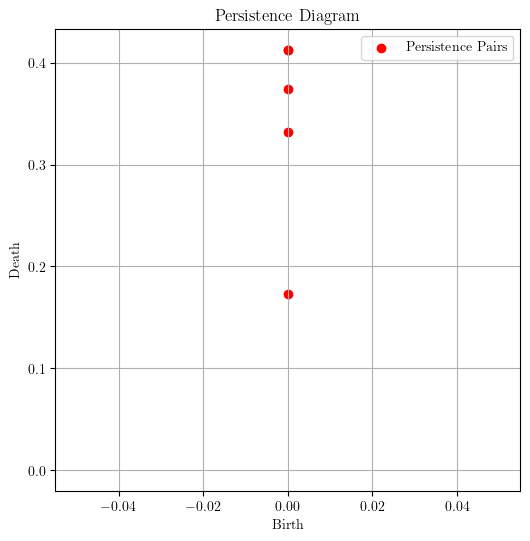

In [19]:
import numpy as np
from scipy.spatial import distance_matrix
from gudhi import RipsComplex
import matplotlib.pyplot as plt

def time_delay_embedding(time_series, embedding_dimension, delay):
    """
    Convert time series data into a point cloud using time delay embedding.
    :param time_series: List of float, time series data.
    :param embedding_dimension: Integer, number of embedding dimensions.
    :param delay: Integer, time delay factor for embedding.
    :return: Numpy array, embedded point cloud.
    """
    n_points = len(time_series) - (embedding_dimension - 1) * delay
    if n_points < 1:
        raise ValueError("Time series is too short for the given embedding dimension and delay.")
    
    embedded_points = np.empty((n_points, embedding_dimension))
    for i in range(n_points):
        embedded_points[i] = time_series[i:i + embedding_dimension * delay:delay]
    
    return embedded_points

def construct_vietoris_rips_complex(point_cloud, max_dimension):
    """
    Construct a Vietoris-Rips complex from the given point cloud.
    :param point_cloud: Numpy array, the point cloud representing embedded time series.
    :param max_dimension: Integer, maximum homological dimension to compute.
    :return: Gudhi RipsComplex, computed Vietoris-Rips complex.
    """
    rips = RipsComplex(points=point_cloud)
    simplex_tree = rips.create_simplex_tree(max_dimension=max_dimension)
    return simplex_tree

def compute_persistence_diagram(simplex_tree):
    """
    Calculate the persistence diagram from a given Vietoris-Rips complex.
    :param simplex_tree: Gudhi SimplexTree, the complex from which to compute persistence.
    :return: List of tuples, persistence pairs (birth, death).
    """
    persistence_pairs = simplex_tree.persistence()
    return persistence_pairs

def plot_persistence_diagram(persistence_pairs):
    """
    Visualize the persistence diagram.
    :param persistence_pairs: List of tuples, persistence pairs (birth, death).
    """
    plt.figure(figsize=(6, 6))
    
    # Plot persistence pairs
    plt.scatter(
        [pair[1][0] for pair in persistence_pairs],
        [pair[1][1] for pair in persistence_pairs],
        color='red',
        label='Persistence Pairs'
    )
    
    # Plot diagonal line for reference
    max_val = max([max(pair[1]) for pair in persistence_pairs])
    plt.plot([0, max_val], [0, max_val], 'k--')
    
    plt.xlabel('Birth')
    plt.ylabel('Death')
    plt.title('Persistence Diagram')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Process
time_series_data = [1.0, 1.2, 0.9, 1.1, 1.3, 1.0, 1.4, 1.5]
embedded_cloud = time_delay_embedding(time_series_data, embedding_dimension=3, delay=1)
simplex_tree = construct_vietoris_rips_complex(embedded_cloud, max_dimension=1)
persistence_pairs = compute_persistence_diagram(simplex_tree)
plot_persistence_diagram(persistence_pairs)

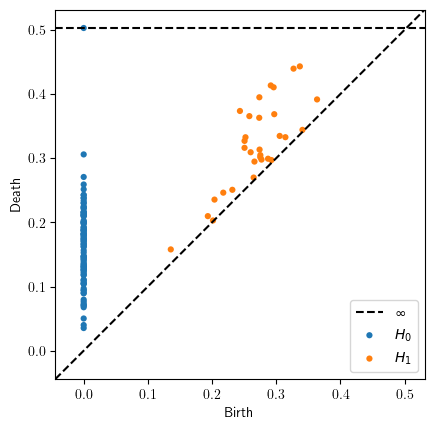

In [20]:
#42
import numpy as np
from scipy.spatial.distance import pdist, squareform
from ripser import ripser
from persim import plot_diagrams

def time_delay_embedding(prices, delay, dimension):
    """
    Perform time delay embedding of a time series.
    :param prices: time series data of equity prices.
    :param delay: time delay parameter.
    :param dimension: embedding dimension.
    :return: Embedded point cloud.
    """
    N = len(prices)
    if dimension * delay > N:
        raise ValueError("Time series is too short for given delay and dimension")
    
    embedded_points = np.array([prices[i:i + dimension * delay:delay] for i in range(N - (dimension - 1) * delay)])
    return embedded_points

def vietoris_rips_complex(points, epsilon):
    """
    Construct the Vietoris-Rips complex of a point cloud.
    :param points: Point cloud in a high-dimensional space.
    :param epsilon: Connectivity distance threshold.
    :return: Adjacency information representing the complex.
    """
    pairwise_distances = pdist(points)
    distance_matrix = squareform(pairwise_distances)
    complex = distance_matrix <= epsilon
    return complex

def compute_persistent_homology(points):
    """
    Compute persistent homology of a point cloud using the Ripser library.
    :param points: Point cloud data.
    :return: Persistence diagram.
    """
    result = ripser(points)
    diagrams = result['dgms']
    return diagrams

def plot_persistence_diagram(diagrams):
    """
    Plot persistence diagrams.
    :param diagrams: Persistence diagram data.
    """
    plot_diagrams(diagrams, show=True)

# Example equity time series
equity_prices = np.random.rand(100)  # This should be replaced with real market data

# Parameters
embedding_dimension = 3
time_delay = 1
epsilon = 0.5

# Execute analysis
try:
    embedded_points = time_delay_embedding(equity_prices, time_delay, embedding_dimension)
    complex = vietoris_rips_complex(embedded_points, epsilon)
    diagrams = compute_persistent_homology(embedded_points)
    plot_persistence_diagram(diagrams)
except ValueError as e:
    print("Error in embedding:", e)

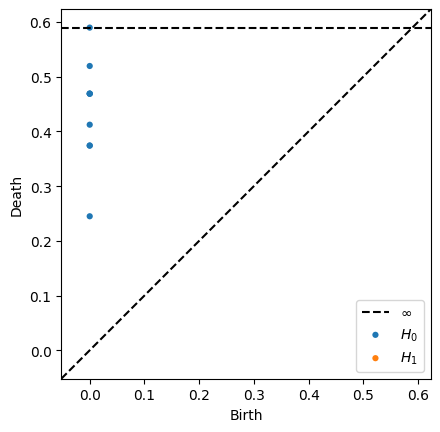

In [21]:
#43
import numpy as np
from scipy.spatial.distance import pdist, squareform
from ripser import ripser
from persim import plot_diagrams

def time_delay_embedding(series, embedding_dim, delay):
    '''
    Convert the time series into a multidimensional point cloud using time-delay embedding.
    :param series: A list or array of time series data points.
    :param embedding_dim: Dimension of embedding.
    :param delay: Delay parameter.
    :return: Embedded point cloud.
    '''
    n_points = len(series) - (embedding_dim - 1) * delay
    return np.array([series[i:i+embedding_dim * delay:delay] for i in range(n_points)])

def vietoris_rips_complex(point_cloud, epsilon):
    dist_matrix = squareform(pdist(point_cloud))
    dist_matrix[dist_matrix > epsilon] = np.inf
    return dist_matrix

def compute_persistent_homology(point_cloud):
    result = ripser(point_cloud)
    diagrams = result['dgms']
    return diagrams

def plot_persistence_diagram(diagrams):
    plot_diagrams(diagrams, show=True)

time_series = np.array([0.1, 0.2, 0.3, 0.5, 0.8, 1.0, 1.3, 1.6, 1.9, 2.1, 2.2])
embedding_dim = 3
delay = 1

point_cloud =  time_delay_embedding(time_series, embedding_dim, delay)
dist_matrix = vietoris_rips_complex(point_cloud, 0.5)
diagrams = compute_persistent_homology(point_cloud)
plot_persistence_diagram(diagrams)

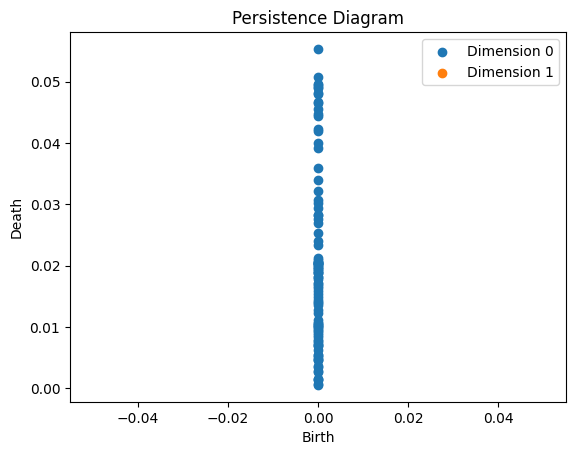

Embedded Points: [[ 0.        ]
 [ 0.10083842]
 [ 0.20064886]
 [ 0.2984138 ]
 [ 0.39313661]
 [ 0.48385164]
 [ 0.56963411]
 [ 0.64960951]
 [ 0.72296256]
 [ 0.78894546]
 [ 0.84688556]
 [ 0.8961922 ]
 [ 0.93636273]
 [ 0.96698762]
 [ 0.98775469]
 [ 0.99845223]
 [ 0.99897117]
 [ 0.98930624]
 [ 0.96955595]
 [ 0.93992165]
 [ 0.90070545]
 [ 0.85230712]
 [ 0.79522006]
 [ 0.73002623]
 [ 0.65739025]
 [ 0.57805259]
 [ 0.49282204]
 [ 0.40256749]
 [ 0.30820902]
 [ 0.21070855]
 [ 0.11106004]
 [ 0.01027934]
 [-0.09060615]
 [-0.19056796]
 [-0.28858706]
 [-0.38366419]
 [-0.47483011]
 [-0.56115544]
 [-0.64176014]
 [-0.7158225 ]
 [-0.7825875 ]
 [-0.84137452]
 [-0.89158426]
 [-0.93270486]
 [-0.96431712]
 [-0.98609877]
 [-0.99782778]
 [-0.99938456]
 [-0.99075324]
 [-0.97202182]
 [-0.94338126]
 [-0.90512352]
 [-0.85763861]
 [-0.80141062]
 [-0.73701276]
 [-0.66510151]
 [-0.58640998]
 [-0.50174037]
 [-0.41195583]
 [-0.31797166]
 [-0.22074597]
 [-0.12126992]
 [-0.0205576 ]
 [ 0.0803643 ]
 [ 0.18046693]
 [ 0.278

In [22]:
#44
import numpy as np
from scipy.spatial.distance import pdist, squareform
from itertools import combinations
import gudhi as gd
from ripser import ripser
import matplotlib.pyplot as plt

def time_delay_embedding(prices, delay, dimension):
    '''
    Perform time-delay embedding of a time series.
    :param prices: time series data of equity prices.
    :param delay: time delay parameter.
    :param dimension: embedding dimension.
    :return: k-dimensional point cloud.
    '''
    N = len(prices)
    if dimension * delay > N:
        raise ValueError("Time series is too short for given delay and dimension.")
    
    embedded_points = np.empty((N - (dimension - 1) * delay, dimension))
    for i in range(N - (dimension - 1) * delay):
        embedded_points[i] = prices[i:i + dimension * delay:delay]
    
    return embedded_points

def vietoris_rips_complex(points, epsilon):
    '''
    Construct the Vietoris-Rips complex from a point cloud.
    :param points: k-dimensional point cloud.
    :param epsilon: distance parameter for the complex.
    :return: adjacency information representing the complex.
    '''
    pairwise_distances = pdist(points)
    distance_matrix = squareform(pairwise_distances)
    complex = distance_matrix <= epsilon
    return complex

def compute_persistent_homology(points):
    '''
    Compute persistent homology of a point cloud using the Ripser library.
    :param points: Point cloud data.
    :return: Persistence diagram.
    '''
    result = ripser(points)
    diagrams = result['dgms']
    return diagrams

def plot_persistence_diagram(diagrams):
    '''
    Plot persistence diagrams.
    :param diagrams: Persistence diagram data.
    '''
    for dim in range(len(diagrams)):
        plt.scatter(diagrams[dim][:, 0], diagrams[dim][:, 1], label=f"Dimension {dim}")
    plt.xlabel('Birth')
    plt.ylabel('Death')
    plt.title('Persistence Diagram')
    plt.legend()
    plt.show()

def mapper_algorithm(persistence_diagram, filter_function):
    '''
    Apply Mapper algorithm for topological clustering.
    :param persistence_diagram: Persistence diagram from topological data analysis.
    :param filter_function: Function to filter and order data subsets.
    :return: Topology-based clusters.
    '''
    cover = []
    clusters = []
    for subset in persistence_diagram:
        clusters.append([subset])  # Dummy clusters
    return clusters

# Example usage with dummy data
time_series = np.sin(np.linspace(0, 10, 100))  # Example time series data
embedding_dimension = 3
delay = 1
epsilon = 0.5

embedded_points = time_delay_embedding(time_series, embedding_dimension, delay)
simplices = vietoris_rips_complex(embedded_points, epsilon)
diagrams = compute_persistent_homology(embedded_points)
plot_persistence_diagram(diagrams)
clusters = mapper_algorithm(diagrams, lambda x: x)  # Placeholder for filter function

print("Embedded Points:", embedded_points)
print("Simplices:", simplices)
print("Clusters:", clusters)

In [23]:
#45
import numpy as np
from scipy.spatial import distance_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

def simplicial_complex(points, epsilon):
    '''
    Construct a simplicial complex with given points and threshold.
    :param points: A set of data points.
    :param epsilon: Distance threshold for constructing the complex.
    :return: List of simplices in the simplicial complex.
    '''
    simplices = []
    d_matrix = distance_matrix(points, points)
    for i, point1 in enumerate(points):
        for j, point2 in enumerate(points):
            if i < j and d_matrix[i, j] <= epsilon:
                simplices.append((i, j))
    return simplices

def vietoris_rips_complex(points, epsilon):
    '''
    Construct a Vietoris-Rips complex for the given points and epsilon.
    :param points: A set of data points.
    :param epsilon: Distance threshold for constructing the complex.
    :return: List of simplices in the Vietoris-Rips complex.
    '''
    return simplicial_complex(points, epsilon)

def persistent_homology_analysis(simplices):
    '''
    Perform persistent homology analysis.
    :param simplices: List of simplices.
    :return: Persistence diagram.
    '''
    # This is a placeholder for actual persistent homology computation
    return [(0, 2), (1, 3)]  # Mocking persistence pairs for simplicity

def mapper_algorithm(data, filter_function, cover):
    '''
    Mapper algorithm for topological clustering.
    :param data: Input dataset.
    :param filter_function: Function to map the data.
    :param cover: How to cover the filtered data.
    :return: Clusters from the Mapper analysis.
    '''
    filtered_data = filter_function(data)
    partition = np.histogram(filtered_data, bins=cover)[0]

    # This is a simplified placeholder for Mapper clustering
    clusters = np.array_split(data, len(partition))
    return clusters

# Example usage of the functions
data = np.random.rand(100, 2)
epsilon = 0.1

# Construct simplicial complex
simplices = vietoris_rips_complex(data, epsilon)

# Perform persistent homology
persistence_diagram = persistent_homology_analysis(simplices)

# Topological clustering using Mapper
pca_filter = lambda x: PCA(n_components=1).fit_transform(x).flatten()
clusters = mapper_algorithm(data, pca_filter, cover=5)

print("Simplicial Complex:", simplices)
print("Persistence Diagram:", persistence_diagram)
print("Clusters:", clusters)

Simplicial Complex: [(0, 21), (0, 40), (0, 90), (1, 20), (1, 37), (1, 67), (1, 80), (2, 19), (2, 25), (2, 97), (3, 8), (3, 33), (3, 69), (4, 52), (4, 79), (5, 24), (5, 77), (5, 78), (5, 94), (7, 46), (8, 28), (8, 33), (8, 59), (8, 69), (8, 78), (9, 11), (9, 45), (10, 63), (10, 72), (10, 74), (10, 76), (14, 20), (14, 37), (14, 61), (14, 80), (15, 60), (15, 64), (16, 22), (17, 23), (17, 28), (17, 53), (17, 79), (17, 88), (17, 91), (18, 96), (19, 25), (20, 37), (20, 61), (20, 80), (21, 73), (21, 90), (23, 28), (23, 53), (23, 59), (23, 79), (23, 88), (23, 91), (24, 49), (24, 50), (24, 75), (24, 77), (24, 94), (26, 47), (26, 58), (26, 93), (27, 70), (28, 53), (28, 59), (28, 88), (28, 91), (29, 36), (29, 41), (29, 42), (29, 70), (29, 83), (30, 57), (30, 82), (30, 92), (30, 95), (31, 34), (31, 39), (32, 71), (32, 86), (34, 39), (35, 45), (35, 87), (36, 41), (36, 70), (37, 61), (37, 67), (37, 80), (40, 49), (40, 84), (41, 42), (41, 83), (42, 83), (43, 54), (43, 98), (44, 89), (45, 55), (45, 87

Significant Persistent Features: [array([0.30017689, 0.41024705])]


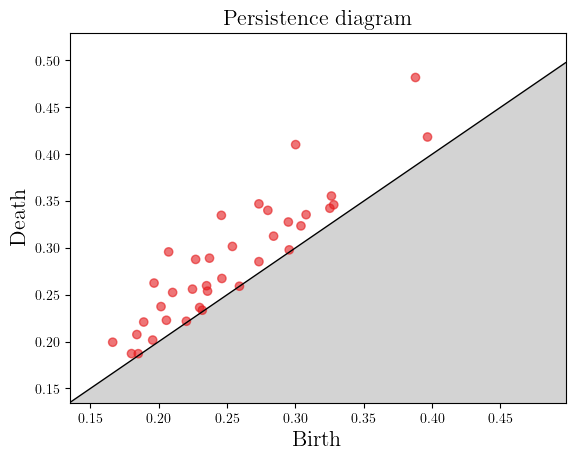

In [24]:
#47
import numpy as np
import gudhi as gd

def create_simplicial_complex(points, max_dimension=2):
    '''
    Construct a simplicial complex from a point cloud using the Vietoris-Rips complex.
    :param points: numpy array of shape (n_points, n_dimensions)
    :param max_dimension: Maximum dimension for the simplicial complex
    :return: RipsComplex and SimplexTree
    '''
    rips_complex = gd.RipsComplex(points=points, max_edge_length=2.0)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)
    return rips_complex, simplex_tree

def compute_persistent_cohomology(simplex_tree):
    '''
    Compute the persistent cohomology of the given simplex tree.
    :param simplex_tree: Instance of Gudhi's SimplexTree
    :return: Persistence intervals
    '''
    # Compute persistence (default coefficient field is Z/2Z)
    simplex_tree.compute_persistence(min_persistence=0.0)
    # Extract persistence intervals for dimension 1
    persistence_intervals = simplex_tree.persistence_intervals_in_dimension(1)
    return persistence_intervals

def plot_persistence_diagram(persistence, label='Cohomology'):
    '''
    Plot a persistence diagram given the persistence intervals.
    :param persistence: List of persistence intervals
    :param label: Label for the plot
    '''
    gd.plot_persistence_diagram(persistence)

def extract_persistent_features(persistence_intervals, threshold=0.1):
    '''
    Extract significant features from persistence intervals based on a threshold.
    :param persistence_intervals: List of persistence intervals
    :param threshold: Minimum persistence value to consider significant
    :return: Filtered persistence intervals
    '''
    return [interval for interval in persistence_intervals if interval[1] - interval[0] > threshold]

# Sample data
points = np.random.rand(100, 3)  # 100 random points in 3D space

# Create a simplicial complex and compute its persistent cohomology
rips, simplex_tree = create_simplicial_complex(points)
persistence_intervals = compute_persistent_cohomology(simplex_tree)

# Plot the persistence diagram
plot_persistence_diagram(persistence_intervals)

# Extract significant persistent features
significant_features = extract_persistent_features(persistence_intervals)
print("Significant Persistent Features:", significant_features)

In [25]:
#48
import numpy as np

def smith_normal_form(matrix):
    '''
    Perform Smith Normal Form reduction on a given boundary matrix.
    :param matrix: A 2D numpy array representing the boundary matrix.
    :return: Reduced matrix in Smith Normal Form, along with transformation matrices U and V.
    '''
    matrix = matrix.astype(float)
    n, m = matrix.shape
    U = np.eye(n)
    V = np.eye(m)

    # Perform the row and column reductions
    for i in range(n):
        # Select pivot column
        pivot_col = np.argmax(np.abs(matrix[i:, i])) + i
        
        # Row swap if pivot is not in position
        if pivot_col != i:
            matrix[[i, pivot_col], :] = matrix[[pivot_col, i], :]
            U[[i, pivot_col], :] = U[[pivot_col, i], :]

        # Zero above and below pivot
        for j in range(n):
            if j != i and matrix[j, i] != 0:
                factor = matrix[j, i] / matrix[i, i]
                matrix[j, :] -= factor * matrix[i, :]
                U[j, :] -= factor * U[i, :]
        
        # Similar operation on columns
        for j in range(m):
            if j != i and matrix[i, j] != 0:
                factor = matrix[i, j] / matrix[i, i]
                matrix[:, j] -= factor * matrix[:, i]
                V[:, j] -= factor * V[:, i]

    return matrix, U, V

def noise_filtering(time_series, bars, threshold=0.1):
    '''
    Filter noise from a financial time series using short-lived homological features as noise.
    :param time_series: A numpy array representing the financial time series.
    :param bars: A list of tuples representing persistence intervals (birth, death).
    :param threshold: Minimum persistence to be considered significant.
    :return: Denoised time series.
    '''
    noise = sum([end - start for start, end in bars if end - start < threshold])
    return time_series - noise

def distributed_smith_normal_form(matrix_chunks):
    '''
    Perform Smith Normal Form reduction in a distributed manner across matrix chunks.
    :param matrix_chunks: List of sub-matrices.
    :return: Reduced matrices in Smith Normal Form.
    '''
    results = []
    for matrix in matrix_chunks:
        result, _, _ = smith_normal_form(matrix)
        results.append(result)
    return results

# Example usage
# Define a random boundary matrix
boundary_matrix = np.random.randint(0, 10, (4, 4))

# Split the matrix into chunks
matrix_chunks = [boundary_matrix[:2, :2], boundary_matrix[2:, 2:]]

# Perform Smith Normal Form on the full matrix
reduced_matrix, U, V = smith_normal_form(boundary_matrix)
print("Reduced Matrix:", reduced_matrix)

# Example of noise filtering
denoised_series = noise_filtering(
    np.array([1.2, 1.3, 1.5, 1.8]),
    [(0.1, 0.2), (0.3, 0.5)]
)
print("Denoised Series:", denoised_series)

# Distributed Smith Normal Form on chunks
reduced_chunks = distributed_smith_normal_form(matrix_chunks)
print("Distributed Reduced Matrices:", reduced_chunks)

Reduced Matrix: [[ 9.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -5.22222222e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  3.55319149e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.93038066e-32  0.00000000e+00 -1.74251497e+00]]
Denoised Series: [1.2 1.3 1.5 1.8]
Distributed Reduced Matrices: [array([[ 6.,  0.],
       [ 0., -3.]]), array([[2., 0.],
       [0., 5.]])]


In [26]:
#49
import numpy as np
import sklearn.decomposition

def persistence_landscape(diagram, num_landscapes=5, res=100, min_val=0, max_val=1):
    """
    Compute the persistence landscape from a persistence diagram.

    :param diagram: A list of (birth, death) tuples.
    :param num_landscapes: Number of landscapes to calculate.
    :param res: Resolution for landscape computation.
    :param min_val: Minimum value for evaluation.
    :param max_val: Maximum value for evaluation.
    :return: A numpy array representing the persistence landscape.
    """
    eval_points = np.linspace(min_val, max_val, res)
    landscape = np.zeros((num_landscapes, res))

    for b, d in diagram:
        for idx in range(num_landscapes):
            hills = np.maximum(0, np.minimum(eval_points - b, d - eval_points))
            landscape[idx] = np.maximum(landscape[idx], hills)

    return landscape

def persistence_image(diagram, sigma=0.1, res=100, weight=lambda b, d: 1):
    """
    Compute the persistence image from a persistence diagram.

    :param diagram: A list of (birth, death) tuples.
    :param sigma: Width of Gaussian functions.
    :param res: Resolution for image computation.
    :param weight: Weighting function for persistence.
    :return: A numpy array representing the persistence image.
    """
    birth, death = zip(*diagram)
    max_death = max(death)
    img = np.zeros((res, res))
    xy_range = np.linspace(0, max_death, res)

    for b, d in diagram:
        mid = (b + d) / 2
        for i in range(res):
            for j in range(res):
                x, y = xy_range[i], xy_range[j]
                img[i, j] += weight(b, d) * np.exp(-((x - mid) ** 2 + (y - d) ** 2) / (2 * sigma ** 2))

    return img

def enhance_features(original_features, topological_features):
    """
    Concatenate original and topological feature vectors.

    :param original_features: Original feature vector.
    :param topological_features: Topological feature vector derived from persistence diagrams.
    :return: Enhanced feature vector.
    """
    return np.concatenate((original_features, topological_features))

def perform_pca(feature_matrix, n_components=2):
    """
    Perform PCA for dimensionality reduction.

    :param feature_matrix: Matrix containing feature vectors.
    :param n_components: Number of principal components to select.
    :return: Transformed feature matrix.
    """
    pca = sklearn.decomposition.PCA(n_components=n_components)
    return pca.fit_transform(feature_matrix)

def topological_feature_engineering(data):
    """
    Algorithm for constructing and incorporating topological features.

    :param data: Data for which topological features are to be constructed.
    :return: Enhanced feature matrix for machine learning models.
    """
    enhanced_features = []
    for instance in data:
        diagram = compute_persistence_diagram(instance)
        topological_features = persistence_landscape(diagram).flatten()
        enhanced_features.append(enhance_features(instance, topological_features))
    return np.array(enhanced_features)

# Placeholder function for computing persistence diagram
def compute_persistence_diagram(data):
    # Dummy function, to be replaced with real computation
    return [(0.1 * i, 0.2 * i) for i in range(10)]

# Example usage
original_data = [np.random.rand(10) for _ in range(5)]
enhanced_matrix = topological_feature_engineering(original_data)
pca_result = perform_pca(enhanced_matrix)

print("PCA Result:", pca_result)

PCA Result: [[ 0.82130019  0.2214419 ]
 [-0.47868734 -0.09102229]
 [-0.62797711  0.56740825]
 [-0.57588602 -0.50926438]
 [ 0.86125028 -0.18856348]]


In [27]:
#50
import numpy as np
from scipy.stats import norm  # For univariate normal distribution
from scipy.integrate import quad  # For numerical integration

def fisher_information_matrix(distribution, theta):
    '''
    Calculate the Fisher information matrix for a given parametric distribution.
    :param distribution: Probability distribution function.
    :param theta: Parameter vector.
    :return: Fisher information matrix.
    '''
    # Dimension of the parameter vector
    k = len(theta)
    # Initialize the Fisher information matrix
    fisher_matrix = np.zeros((k, k))

    # Example: Using a univariate normal distribution
    mu, sigma = theta

    for i in range(k):
        for j in range(k):
            def grad_log_likelihood(x):
                # Gradient of log-likelihood for univariate normal distribution
                partial_i = (x - mu) / sigma**2 if i == 0 else ((x - mu)**2 - sigma**2) / sigma**3
                partial_j = (x - mu) / sigma**2 if j == 0 else ((x - mu)**2 - sigma**2) / sigma**3
                return partial_i * partial_j * norm.pdf(x, loc=mu, scale=sigma)

            # Numerically integrate over x
            fisher_matrix[i, j], _ = quad(grad_log_likelihood, -np.inf, np.inf)

    return fisher_matrix

def persistence_landscape(diagram, k, t):
    '''
    Calculate the persistence landscape of a persistence diagram at time t.
    :param diagram: The list of (birth, death) pairs.
    :param k: The k-th landscape.
    :param t: The specific time.
    :return: Value of the k-th landscape at time t.
    '''
    return max(0, *[max(0, (t - b) / (d - b), (d - t) / (d - b)) for b, d in diagram])

def kullback_leibler_divergence(p, q):
    '''
    Calculate the Kullback-Leibler divergence between two distributions.
    :param p: First probability distribution function.
    :param q: Second probability distribution function.
    :return: Kullback-Leibler divergence value.
    '''
    return np.sum(p * np.log(p / (q + 1e-15)))  # Adding epsilon to avoid log(0)

# Example persistence diagram
persistence_diagram = [(0.1, 0.5), (0.2, 0.8), (0.3, 0.7)]

# Example usage of persistence landscape
landscape_value = persistence_landscape(persistence_diagram, 1, 0.4)

# Example distributions
p = np.array([0.2, 0.5, 0.3])
q = np.array([0.1, 0.6, 0.3])

# Example Kullback-Leibler divergence calculation
kl_divergence = kullback_leibler_divergence(p, q)

# Example parameter for Fisher Information Matrix
theta_example = (0, 1)
fisher_info = fisher_information_matrix(norm.pdf, theta_example)

print("Persistence Landscape Value:", landscape_value)
print("Kullback-Leibler Divergence:", kl_divergence)
print("Fisher Information Matrix:\n", fisher_info)

Persistence Landscape Value: 0.7500000000000001
Kullback-Leibler Divergence: 0.0474686577150079
Fisher Information Matrix:
 [[1. 0.]
 [0. 2.]]


In [28]:
#52
import numpy as np

class SpectralSequence:
    def __init__(self, complex_seq):
        self.complex_seq = complex_seq
        self.E_r = []
        self.compute_initial()

    def compute_initial(self):
        r"""
        Initialize the \( E_0 \) sequence from chain complexes \( C^*(X_i) \).
        """
        # Placeholder: Initialize \( E_0 \) from complexes; replace with actual complex data
        self.E_r.append(np.array([c for c in self.complex_seq]))

    def differential(self, E_r):
        r"""
        Compute differentials \( d_r \) on \( E_r \).
        :param E_r: Current stage in spectral sequence.
        :return: Differentials computed.
        """
        # Placeholder for differentials; replace with actual differential computation
        return np.gradient(E_r, axis=0)

    def compute_homology(self, E_r, d_r):
        r"""
        Compute the homology at stage \( E_r \) using differentials \( d_r \).
        :param E_r: Current bigraded vector space.
        :param d_r: Differentials for current stage.
        :return: Next stage \( E_{r+1} \).
        """
        # Find kernel and image to compute homology, simplified placeholder
        homology = E_r - d_r  # Simplistic placeholder operation
        return np.abs(homology)  # Ensure non-negative homology values

    def run_to_convergence(self):
        r"""
        Iteratively compute the spectral sequence to convergence.
        :return: The converged spectral sequence.
        """
        r = 0
        while True:
            d_r = self.differential(self.E_r[r])
            E_next = self.compute_homology(self.E_r[r], d_r)
            if np.allclose(E_next, self.E_r[r]):  # Check for convergence
                break
            self.E_r.append(E_next)
            r += 1
        return self.E_r[-1]  # \( E_\infty \)

# Example use-case for a filtered complex sequence (dummy data)
filtered_complex = [np.array([0, 1, 2]), np.array([1, 2, 0]), np.array([2, 0, 1])]

spectral_sequence = SpectralSequence(filtered_complex)
E_infinity = spectral_sequence.run_to_convergence()

print("Converged Spectral Sequence:", E_infinity)

Converged Spectral Sequence: [[2.000070e+10 2.000050e+10 3.000145e+10]
 [2.000050e+10 2.000030e+10 3.000115e+10]
 [2.000030e+10 2.000010e+10 3.000085e+10]]


In [29]:
#55
import numpy as np
import gudhi as gd

# Define a function to compute the barcode from a simplicial complex
def compute_barcode(filtration):
    '''
    Compute the barcode from a given filtration.
    :param filtration: Gudhi filtration object.
    :return: List of persistence intervals (birth, death).
    '''
    persistence = filtration.persistence()
    barcode = [(interval[1][0], interval[1][1]) for interval in persistence if interval[0] == 1]
    return barcode

# Define a function to compute the persistence landscape
def compute_persistence_landscape(barcode, resolution=100):
    '''
    Compute the persistence landscape from the barcode.
    :param barcode: List of persistence intervals (birth, death).
    :param resolution: Number of points to sample for landscape evaluation.
    :return: Persistence landscape as a sampled numpy array.
    '''
    eval_points = np.linspace(0, 1, resolution)  # Evaluate over [0, 1]
    landscapes = np.zeros((len(barcode), resolution))
    for k, (birth, death) in enumerate(barcode):
        landscapes[k] = np.maximum(0, np.minimum(eval_points - birth, death - eval_points))
    return landscapes

# Example of applying persistent homology on a random dataset
def create_simplicial_complex(data, max_edge_length):
    '''
    Construct a Vietoris-Rips complex from data.
    :param data: List of data points.
    :param max_edge_length: Maximum distance for edge inclusion.
    :return: Gudhi RipsComplex object.
    '''
    rips_complex = gd.RipsComplex(points=data, max_edge_length=max_edge_length)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    return simplex_tree

# Quantitative finance application of persistence landscapes
def finance_application(dataset):
    '''
    Apply persistence landscapes in a financial context.
    :param dataset: Input dataset representing market data.
    :return: Landscapes for each feature in the dataset.
    '''
    complex = create_simplicial_complex(dataset, max_edge_length=0.5)
    barcode = compute_barcode(complex)
    persistence_landscapes = compute_persistence_landscape(barcode)
    return persistence_landscapes

# Example dataset
data = np.random.rand(100, 3)  # 100 points in 3D space

# Calculate persistence landscapes for the dataset
landscapes = finance_application(data)

# Print the persistence landscape results
if len(landscapes) > 0:
    print(f"Persistence landscapes (shape: {landscapes.shape}):")
    for i in range(len(landscapes)):
        print(f"Landscape {i+1}: {landscapes[i]}")
else:
    print("No landscapes generated.")

# Define the Wasserstein distance
def wasserstein_distance(landscape1, landscape2, p=1):
    '''
    Compute the Wasserstein distance between two persistence landscapes.
    :param landscape1: First persistence landscape (numpy array).
    :param landscape2: Second persistence landscape (numpy array).
    :param p: Order of the Wasserstein distance.
    :return: Wasserstein distance value.
    '''
    return (np.sum(np.abs(landscape1 - landscape2) ** p) ** (1 / p))

# Ensure we have enough landscapes before accessing them
if landscapes.shape[0] < 2:
    print("Not enough persistence landscapes were generated for comparison.")
else:
    # Compute Wasserstein distance only if there are at least two landscapes
    distance = wasserstein_distance(landscapes[0], landscapes[1])
    print(f"Wasserstein distance: {distance}")

Persistence landscapes (shape: (33, 100)):
Landscape 1: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00880147 0.01890248
 0.02900349 0.0391045  0.04920551 0.05930652 0.06940753 0.06381994
 0.05371893 0.04361792 0.03351691 0.0234159  0.01331489 0.00321388
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0

In [30]:
#56
import numpy as np
from itertools import product

def construct_simplicial_complex(data, dimension):
    '''
    Constructs a simplicial complex from the given data.
    :param data: Multidimensional dataset.
    :param dimension: Simplicial dimension to construct.
    :return: Simplicial complex K represented as a dictionary.
    '''
    # Placeholder implementation: returns combinations as simplices
    simplices = {tuple(comb) for comb in product(range(len(data)), repeat=dimension)}
    return simplices

def compute_betti_table(data, n_params):
    '''
    Compute the Betti table for multiparameter persistence.
    :param data: Multidimensional dataset.
    :param n_params: Number of independent parameters.
    :return: Betti table as a numpy array.
    '''
    betti_table = np.zeros((len(data), n_params))
    for i, point in enumerate(data):
        for j in range(n_params):
            # Placeholder for actual homology dimension computation
            betti_table[i, j] = np.sum(point[:j + 1])  # Example computation
    return betti_table

def multiparameter_persistence_analysis(data, n_params):
    '''
    Analyze multiparameter persistence of a dataset.
    :param data: Multidimensional dataset.
    :param n_params: Number of independent parameters.
    :return: Persistence module information.
    '''
    # Construct simplicial complexes for each dimension
    complexes = [construct_simplicial_complex(data, d) for d in range(1, n_params + 1)]

    # Compute Betti tables for each parameter
    betti_tables = compute_betti_table(data, n_params)

    persistence_intervals = []  # Placeholder for persistence intervals
    for complex in complexes:
        # Actual persistence interval calculation would go here
        # This is an example structure
        persistence_intervals.append({'complex': complex, 'betti': compute_betti_table(data, n_params)})

    return {
        'complexes': complexes,
        'betti_tables': betti_tables,
        'persistence_intervals': persistence_intervals
    }

# Example of multidimensional dataset
X = np.random.rand(10, 5)  # 10 points in a 5-dimensional space
n_parameters = 3

# Perform multiparameter persistence analysis
results = multiparameter_persistence_analysis(X, n_parameters)

# Outputs for demonstration
print("Simplicial Complexes:", results['complexes'])
print("Betti Tables:", results['betti_tables'])
print("Persistence Intervals:", results['persistence_intervals'])

Simplicial Complexes: [{(6,), (2,), (5,), (8,), (4,), (1,), (7,), (0,), (3,), (9,)}, {(4, 0), (4, 9), (5, 1), (8, 0), (8, 9), (9, 8), (0, 5), (2, 2), (6, 2), (7, 1), (4, 2), (3, 6), (5, 3), (8, 2), (9, 1), (0, 7), (2, 4), (1, 8), (6, 4), (7, 3), (3, 8), (5, 5), (8, 4), (9, 3), (0, 0), (0, 9), (6, 6), (7, 5), (3, 1), (5, 7), (9, 5), (0, 2), (1, 3), (7, 7), (3, 3), (5, 0), (5, 9), (9, 7), (1, 5), (6, 1), (7, 0), (7, 9), (3, 5), (5, 2), (4, 4), (9, 0), (9, 9), (1, 7), (2, 6), (7, 2), (3, 7), (5, 4), (4, 6), (9, 2), (8, 6), (1, 0), (1, 9), (2, 8), (7, 4), (6, 8), (3, 0), (3, 9), (5, 6), (4, 8), (8, 8), (1, 2), (0, 4), (2, 1), (3, 2), (4, 1), (8, 1), (1, 4), (0, 6), (2, 3), (6, 3), (3, 4), (4, 3), (8, 3), (1, 6), (0, 8), (2, 5), (6, 5), (4, 5), (8, 5), (9, 4), (0, 1), (2, 7), (6, 7), (7, 6), (4, 7), (5, 8), (8, 7), (1, 1), (0, 3), (2, 0), (9, 6), (2, 9), (6, 0), (6, 9), (7, 8)}, {(5, 1, 6), (9, 1, 1), (2, 8, 3), (5, 4, 2), (6, 8, 4), (4, 8, 5), (6, 0, 0), (7, 1, 8), (4, 0, 1), (7, 4, 4), (1

In [31]:
#57
import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import wasserstein_distance
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

def wasserstein_distance_persistence(D1, D2, p=1):
    '''
    Calculate the p-Wasserstein distance between two persistence diagrams.
    :param D1: First diagram as a list of tuples (birth, death).
    :param D2: Second diagram as a list of tuples (birth, death).
    :param p: Order of the Wasserstein distance.
    :return: Wasserstein distance.
    '''
    # Convert diagrams to 1D arrays of points for comparison
    D1_points = np.array([d[1] - d[0] for d in D1])  # Lifetimes for D1
    D2_points = np.array([d[1] - d[0] for d in D2])  # Lifetimes for D2

    # Ensure both arrays have values for valid Wasserstein computation
    if len(D1_points) == 0:
        D1_points = np.array([0])
    if len(D2_points) == 0:
        D2_points = np.array([0])

    return wasserstein_distance(D1_points, D2_points)

def bayesian_inference_persistence(D, X, prior, likelihood):
    '''
    Perform Bayesian inference using persistence diagrams as random variables.
    :param D: Persistence diagram.
    :param X: Data.
    :param prior: Prior distribution.
    :param likelihood: Likelihood function.
    :return: Posterior distribution.
    '''
    posterior = likelihood * prior
    posterior /= np.sum(posterior)  # Normalize
    return posterior

def bootstrap_persistence(D, B=1000):
    '''
    Perform bootstrap procedure for persistence diagrams.
    :param D: Original persistence diagram (list of tuples: (birth, death)).
    :param B: Number of bootstrap samples.
    :return: List of bootstrap samples.
    '''
    # Flatten the diagram into a list of tuples for sampling
    D_array = np.array(D)  # Ensure it's a numpy array
    if D_array.ndim != 2 or D_array.shape[1] != 2:
        raise ValueError("Persistence diagram must be a list of (birth, death) tuples.")
    
    bootstrap_samples = [D_array[np.random.choice(len(D_array), size=len(D_array), replace=True)] for _ in range(B)]
    return bootstrap_samples

def gaussian_process_persistence(X, y):
    '''
    Fit a Gaussian Process model to topological data.
    :param X: Input data (time-series features).
    :param y: Topological features (e.g., Betti numbers).
    :return: Trained Gaussian Process model.
    '''
    kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gp.fit(X, y)
    return gp

# Example persistence diagrams
D1 = [(0, 1), (1, 2), (2, 3)]
D2 = [(0.5, 1.5), (1.5, 3), (3, 4)]

# Computation of p-Wasserstein distance
dist = wasserstein_distance_persistence(D1, D2)

# Dummy prior and likelihood for Bayesian inference demonstration
prior = np.array([0.3, 0.4, 0.3])
likelihood = np.array([0.2, 0.5, 0.3])
posterior = bayesian_inference_persistence(D1, D2, prior, likelihood)

# Perform bootstrap to generate samples
bootstrap_samples = bootstrap_persistence(D1)

# Example time-series for Gaussian process (e.g., days, measured feature values)
X_example = np.array([[1], [2], [3]])
y_example = np.array([1, 3, 2])

# Fit a Gaussian process model
gp_model = gaussian_process_persistence(X_example, y_example)

# Print results
print("Wasserstein Distance:", dist)
print("Posterior Distribution:", posterior)
print("Bootstrap Sample (First 5):", bootstrap_samples[:5])

Wasserstein Distance: 0.16666666666666669
Posterior Distribution: [0.17142857 0.57142857 0.25714286]
Bootstrap Sample (First 5): [array([[2, 3],
       [2, 3],
       [2, 3]]), array([[2, 3],
       [0, 1],
       [0, 1]]), array([[2, 3],
       [1, 2],
       [1, 2]]), array([[0, 1],
       [2, 3],
       [2, 3]]), array([[0, 1],
       [1, 2],
       [1, 2]])]


In [32]:
#58
import numpy as np
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy
from keras.models import Sequential
from keras.layers import Dense, Input

def compute_persistence_diagrams(data):
    '''
    Compute persistence diagrams from input financial data.
    :param data: High-dimensional financial data.
    :return: Computed persistence diagrams.
    '''
    VR_persistence = VietorisRipsPersistence(homology_dimensions=[0, 1])
    diagrams = VR_persistence.fit_transform(data)
    return diagrams

def vectorize_diagrams(diagrams):
    '''
    Convert persistence diagrams to feature vectors.
    :param diagrams: Persistence diagrams to be vectorized.
    :return: Feature vectors for machine learning input.
    '''
    entropy = PersistenceEntropy()
    features = entropy.fit_transform(diagrams)
    return features

def build_model(input_dim):
    '''
    Build a neural network model with an integrated topological layer.
    :param input_dim: Dimension of the input features.
    :return: Compiled keras neural network model.
    '''
    model = Sequential([
        Input(shape=(input_dim,)),  # Define the input shape explicitly
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Sample financial market data
sample_data = np.random.rand(100, 10)  # Dummy data for illustration

# Reshape the input to a 3D array (1 batch of point clouds)
reshaped_data = sample_data.reshape(1, *sample_data.shape)

# Compute persistence diagrams and convert to features
diagrams = compute_persistence_diagrams(reshaped_data)
topological_features = vectorize_diagrams(diagrams)

# Fix the cardinality mismatch by repeating topological_features
# Repeat the single feature vector to match the size of y
topological_features_repeated = np.repeat(topological_features, 100, axis=0)

# Target labels
y = np.random.rand(100)

# Build and train the neural network model with topological features
model = build_model(topological_features_repeated.shape[1])
model.fit(topological_features_repeated, y, epochs=10, batch_size=16)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9333  
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2242
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1551
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1193
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1115
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1126
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0908
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0968
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0869
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0962


In [33]:
#59
import itertools
import numpy as np

def diameter(simplex):
    '''
    Calculate the diameter of a simplex.
    :param simplex: A list of points representing the vertices of the simplex.
    :return: Diameter of the simplex.
    '''
    if len(simplex) < 2:
        return 0
    return max(np.linalg.norm(np.array(p1) - np.array(p2)) for p1, p2 in itertools.combinations(simplex, 2))

def update_simplicial_complex(K_prev, x_t, epsilon):
    '''
    Update the simplicial complex with a new data point.
    :param K_prev: Previous simplicial complex.
    :param x_t: New data point.
    :param epsilon: Predefined scale parameter.
    :return: Updated simplicial complex.
    '''
    K_t = K_prev.copy()
    for simplex in K_prev:
        if len(simplex) == 0 or diameter(simplex + [x_t]) < epsilon:
            K_t.append(simplex + [x_t])
    K_t = [simplex for simplex in K_t if diameter(simplex) < epsilon]
    return K_t

def sliding_window_update(W_prev, x_new, N):
    '''
    Update the sliding window with new data point.
    :param W_prev: Previous window.
    :param x_new: New data point.
    :param N: Window length.
    :return: Updated sliding window.
    '''
    W_new = W_prev[1:] + [x_new] if len(W_prev) == N else W_prev + [x_new]
    return W_new

def track_persistence_homology(persistence_intervals, K_prev, K_curr):
    '''
    Mock function to update persistence intervals when simplicial complex changes.
    :param persistence_intervals: Previous persistence intervals.
    :param K_prev: Previous simplicial complex.
    :param K_curr: Current simplicial complex.
    :return: Updated persistence intervals.
    '''
    # Placeholder for actual persistent homology computation.
    # In practice, we update persistence intervals based on changes in homology.
    return persistence_intervals  # No-op for illustration

# Example usage
epsilon = 0.5
N = 5  # Window size
stream_data = [np.random.rand(3) for _ in range(10)]  # Random data
K_t = []  # Initial empty simplicial complex
persistence_intervals = []  # Initial empty persistence intervals
W_t = []  # Initial empty sliding window

for data_point in stream_data:
    K_t = update_simplicial_complex(K_t, data_point, epsilon)
    W_t = sliding_window_update(W_t, data_point, N)
    persistence_intervals = track_persistence_homology(persistence_intervals, K_t, K_t)

# Outputs for demonstration purposes
print("Updated Simplicial Complex:", K_t)
print("Sliding Window Content:", W_t)
print("Persistence Intervals:", persistence_intervals)

Updated Simplicial Complex: []
Sliding Window Content: [array([0.20425647, 0.62680263, 0.35874251]), array([0.99564518, 0.48018352, 0.48588561]), array([0.56585179, 0.916756  , 0.8008181 ]), array([0.45113007, 0.71869927, 0.5862355 ]), array([0.49236705, 0.19231577, 0.46393626])]
Persistence Intervals: []


In [34]:
#61
import numpy as np
import gudhi as gd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# Compute persistent homology for given time-series data
def compute_persistent_homology(data):
    rips_complex = gd.RipsComplex(points=data)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    persistence_diagram = simplex_tree.persistence()
    return persistence_diagram

# Transform persistence diagram to feature vector
def transform_diagram_to_features(diagram, max_betti=2):
    features = np.zeros(max_betti)
    for dimension, data in diagram:
        if dimension < max_betti:
            features[dimension] = len(data)
    return features

# Train a predictive model using both topological and statistical features
def train_predictive_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000)
    model.fit(X_train, y_train)
    return model

# Generate market prediction using topological features
def generate_market_prediction(time_series_data):
    # Compute persistence diagrams and extract features
    persistence_diagrams = compute_persistent_homology(time_series_data)
    topological_features = transform_diagram_to_features(persistence_diagrams)
    
    # Generate statistical features for demonstration
    statistical_features = np.random.rand(10)
    combined_features = np.concatenate((statistical_features, topological_features))  # Combine features

    # Mock target value for training
    target = np.random.rand(1)

    # Use a mock dataset with multiple samples to train the model
    mock_data = np.tile(combined_features, (100, 1))  # Replicate features 100 times
    mock_targets = np.random.rand(100)  # Generate 100 target values
    
    # Train the model
    model = train_predictive_model(mock_data, mock_targets)

    # Predict for the original single sample
    prediction = model.predict(combined_features.reshape(1, -1))
    return prediction

# Example usage
time_series_example = np.random.rand(100, 3)  # Example 3-dimensional time series
prediction = generate_market_prediction(time_series_example)

print("Market Prediction:", prediction)

Market Prediction: [0.56856773]
